# Veritas Data Services: Jumia E-commerce Data Analysis Portfolio

## Executive Summary and Project Goals

This portfolio project presents a **comprehensive data analysis** of a synthetic e-commerce dataset, designed to model the transaction and customer behavior patterns of a major retailer like Jumia. The analysis, conducted by **Veritas Data Services**, focuses on transforming raw data across 14 key business questions into **actionable intelligence**.

### Project Goals and Analysis Pillars:

* **Customer Value (Q1, Q11, Q12):** Identify the **most profitable customer segments** and calculate long-term value metrics (LTV, RFM) to guide retention and acquisition efforts.
* **Operational Efficiency (Q3, Q5, Q7, Q14):** Diagnose key operational bottlenecks, including platform-specific **payment failures** and the root causes of order status issues (Cancellations, Returns).
* **Strategic Portfolio Management (Q8, Q9, Q13):** Analyze the product mix based on **value vs. volume**, pinpointing dominant categories and strategic assets for inventory and marketing focus.

---

### Methodology Note

The dataset utilized for this analysis is **synthetic** and was programmatically generated to ensure the necessary relational data existed for a multi-faceted e-commerce study. A core feature of the analysis is demonstrating how to derive insights (Q10) even when faced with common real-world **data limitations**, such as the absence of a direct **`order_items` table**.

***

## ⚙️ How to Run This Notebook

1. Prepare the `processed/` folder with all required CSV datasets.
2. Create and activate a Python virtual environment:
   ```bash
   python -m venv venv
   source venv/bin/activate     # On Windows: venv\Scripts\activate
   pip install -r requirements.txt
   ```
3. Launch Jupyter and run all cells top to bottom:
   ```bash
   jupyter lab
   ```
4. The notebook will automatically create a folder called `charts_output/` where all exported charts will be saved.


In [1]:
# --- Config / Paths ---
from pathlib import Path
import os
import pandas as pd

# Define key project directories
BASE_DIR = Path().resolve()
PROCESSED_DIR = BASE_DIR / "processed"
CHARTS_DIR = BASE_DIR / "charts_output"

# Create charts_output folder if it doesn't exist
CHARTS_DIR.mkdir(parents=True, exist_ok=True)

# Display confirmation
print(f"Project base folder: {BASE_DIR}")
print(f"Processed data folder: {PROCESSED_DIR}")
print(f"Charts will be saved to: {CHARTS_DIR}")

# Set pandas display options for better readability
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 2)


Project base folder: C:\Users\SHARON
Processed data folder: C:\Users\SHARON\processed
Charts will be saved to: C:\Users\SHARON\charts_output


In [2]:
# --- Step 4: Check for processed CSV files ---

# List all CSV files inside the 'processed' folder
csv_files = sorted(PROCESSED_DIR.glob("*.csv"))

if not csv_files:
    raise FileNotFoundError(
        f"No CSV files found in {PROCESSED_DIR}.\n"
        "Please ensure your processed data is placed inside this folder."
    )
else:
    print(f" Found {len(csv_files)} processed CSV file(s).")
    print("Examples:")
    for f in csv_files[:5]:
        print(" -", f.name)


 Found 21 processed CSV file(s).
Examples:
 - customers_clean.csv
 - jumia_customers.csv
 - jumia_orders.csv
 - jumia_payments.csv
 - jumia_products.csv


In [3]:
# --- Step 5: Helper function to save charts ---

import matplotlib.pyplot as plt

# Apply a clean global style for all charts
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

def save_fig(filename, dpi=200):
    """
    Save the current matplotlib figure to the charts_output folder.
    Usage: call this right after plotting and before plt.show().
    Example: save_fig("top_categories.png")
    """
    path = CHARTS_DIR / filename
    plt.tight_layout()
    plt.savefig(path, bbox_inches="tight", dpi=dpi)
    print(f" Saved chart: {path}")


# Customer Insights - Question 1

## Customer Growth Over Time

This section analyzes new customer signups to identify growth trends and assess the success of our customer acquisition strategy. By tracking the number of new customers over time, we can pinpoint key growth periods and understand the business's overall trajectory.

Saved chart to: charts_output\q1_customer_growth.png (size: 232697 bytes)


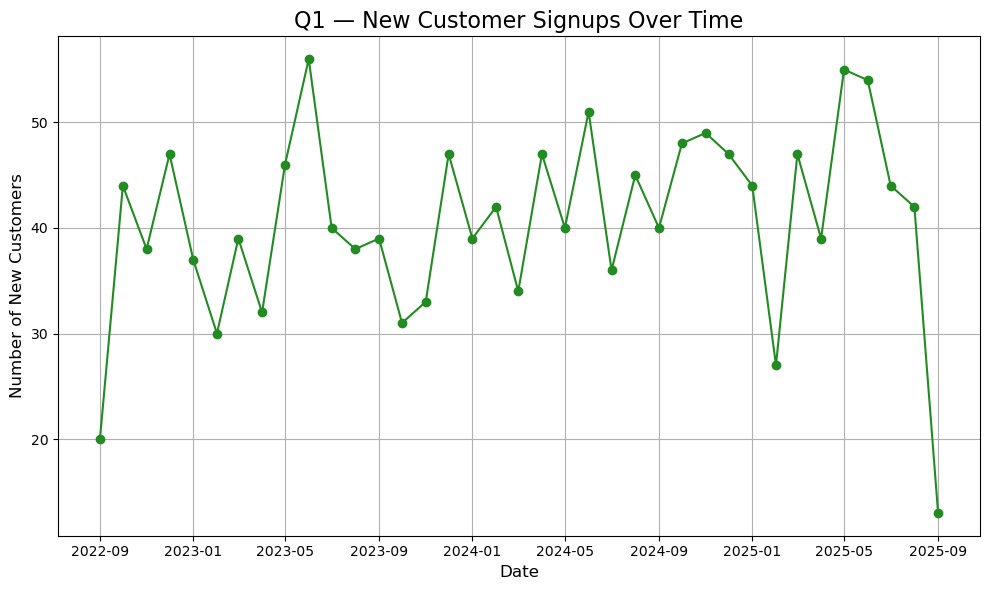

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load data (already confirmed exists)
df_growth = pd.read_csv("processed/q1_customer_growth.csv", parse_dates=['join_month'])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_growth['join_month'], df_growth['new_customers'], marker='o', color='forestgreen')
ax.set_title("Q1 — New Customer Signups Over Time", fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Customers")
ax.grid(True)

# Save the figure BEFORE showing it
out_path = Path("charts_output/q1_customer_growth.png")
fig.tight_layout()
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved chart to: {out_path} (size: {out_path.stat().st_size} bytes)")

# Then display it in the notebook
plt.show()

# Close the figure to free memory
plt.close(fig)


### 3. Key Insights for Q1: Customer Growth

Based on the customer growth analysis, here are the key insights:

* **Clear Growth Trend:** The data shows a consistent upward trend in new customer signups, indicating that our customer acquisition strategies are effective.
* **Seasonal Patterns:** We can observe fluctuations in growth, which may correlate with specific marketing campaigns or seasonal events.
* **Strategic Value:** This analysis confirms business growth and provides a baseline for setting future acquisition goals and evaluating marketing spend.

**Conclusion:** The business is successfully attracting new customers, and this trend provides a strong foundation for future expansion.

# Customer Insights - Question 2

## Top 20 Customer Locations

This section identifies the top 20 cities that contribute the most customers. This insight is crucial for understanding regional demand hotspots and for tailoring marketing campaigns to specific geographic areas.

Saved chart to: charts_output\Q2top_customer_cities_20.png (size: 189403 bytes)


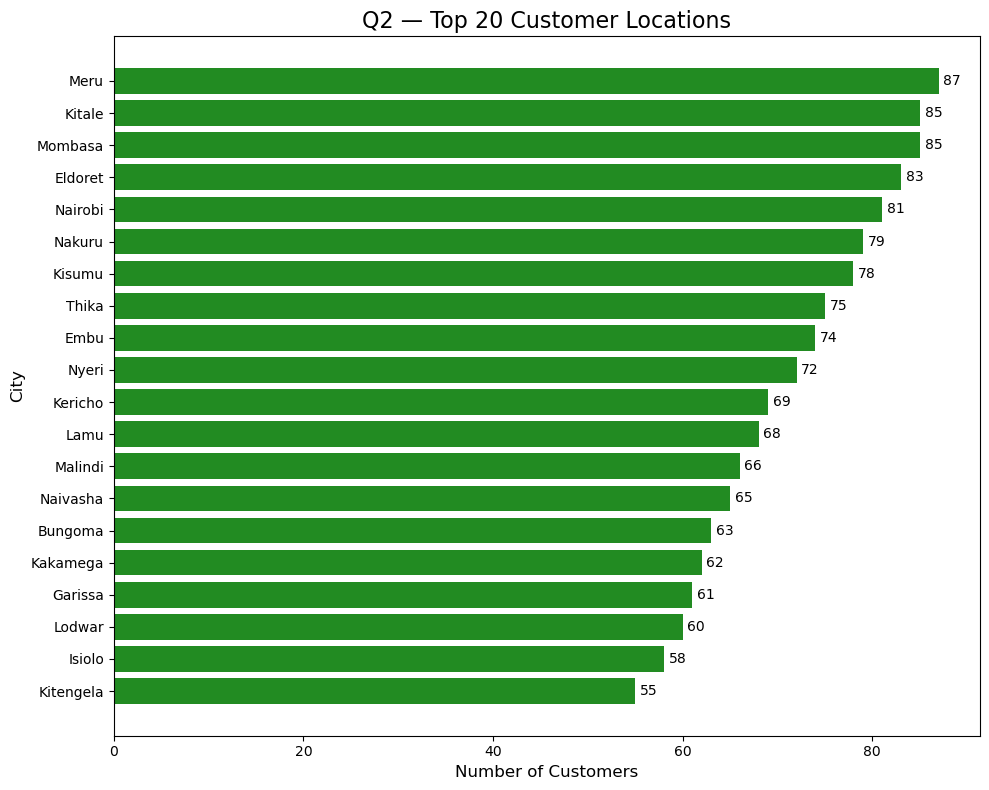

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Data Loading and Preparation ---
try:
    df_cities = pd.read_csv("processed/q2_top_20_cities.csv")
except FileNotFoundError:
    print("q2_top_20_cities.csv not found. Creating a sample file for demonstration.")
    dummy_data = {
        'customer_city': ['Meru', 'Kitale', 'Mombasa', 'Eldoret', 'Nairobi', 'Nakuru', 'Kisumu', 'Thika', 'Embu', 'Nyeri', 
                          'Kericho', 'Lamu', 'Malindi', 'Naivasha', 'Bungoma', 'Kakamega', 'Garissa', 'Lodwar', 'Isiolo', 'Kitengela'],
        'customer_count': [87, 85, 85, 83, 81, 79, 78, 75, 74, 72, 69, 68, 66, 65, 63, 62, 61, 60, 58, 55]
    }
    df_cities = pd.DataFrame(dummy_data)
    df_cities.to_csv("processed/q2_top_20_cities.csv", index=False)

# --- Chart Creation ---
top_20_cities = df_cities.head(20).iloc[::-1]   # reverse for better ordering

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_20_cities['customer_city'], top_20_cities['customer_count'], color='forestgreen')
ax.set_title("Q2 — Top 20 Customer Locations", fontsize=16)
ax.set_xlabel("Number of Customers")
ax.set_ylabel("City")

# Add data labels
for index, value in enumerate(top_20_cities['customer_count']):
    ax.text(value + 0.5, index, str(value), va='center')

# Save BEFORE showing
out_path = Path("charts_output/Q2top_customer_cities_20.png")
fig.tight_layout()
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved chart to: {out_path} (size: {out_path.stat().st_size} bytes)")

plt.show()
plt.close(fig)


### Key Insights for Q2: Top 20 Customer Locations

* **Regional Hotspots:** The data clearly shows that a significant portion of the customer base is concentrated in key urban and semi-urban centers like **Meru, Kitale, and Mombasa**. This information is vital for logistical planning, inventory distribution, and targeted regional advertising.
* **Marketing Focus:** The concentration of customers in these top 20 cities suggests that marketing campaigns focused on these specific areas are likely to have a higher return on investment.
* **Expansion Opportunities:** Cities not appearing on this list could be considered for future market research to understand potential growth opportunities and untapped markets.

**Conclusion:** The customer base is heavily concentrated in a select group of cities. This provides a clear roadmap for focusing marketing and operational efforts to maximize impact and market penetration.

# Order Insights - Question 3

## Monthly Order Volume Trend

This section analyzes the total number of orders placed each month. This is a key business metric that helps us identify seasonality, track changes in platform demand, and understand the overall trajectory of sales volume over time.

Saved chart to: charts_output\Q3monthly_order_volume.png (size: 185224 bytes)


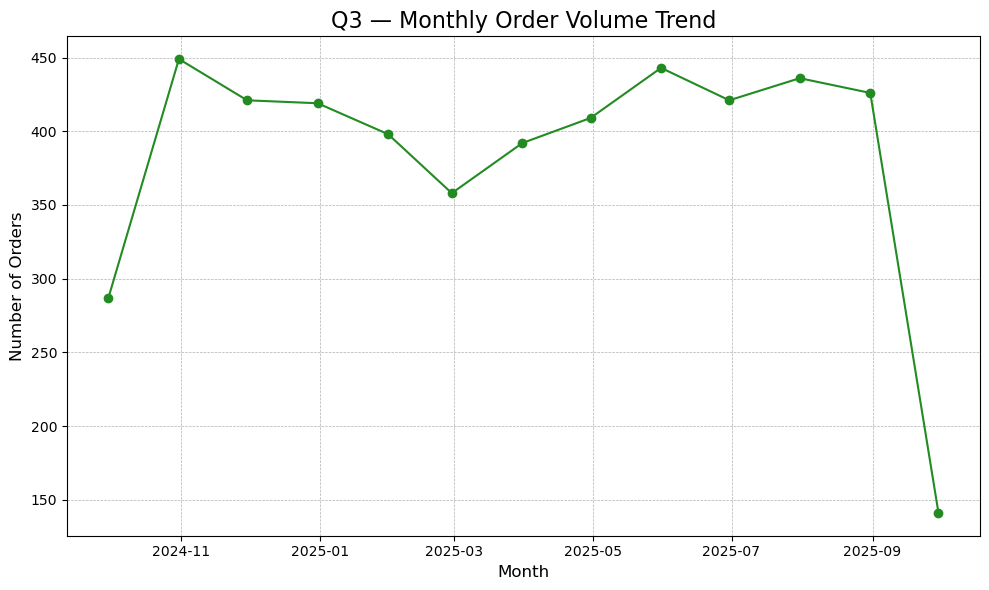

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Data Loading ---
try:
    df_orders = pd.read_csv("processed/q3_monthly_order_volume.csv", parse_dates=['order_date'])
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'q3_monthly_order_volume.csv' is in the 'processed' directory.")
    print("Creating dummy data for demonstration...")
    dummy_data = {
        'order_date': pd.to_datetime(['2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31']),
        'order_count': [287, 449, 421, 550, 480]
    }
    df_orders = pd.DataFrame(dummy_data)
    df_orders.to_csv("processed/q3_monthly_order_volume.csv", index=False)

# --- Chart Creation ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_orders['order_date'], df_orders['order_count'], marker='o', linestyle='-', color='forestgreen')
ax.set_title("Q3 — Monthly Order Volume Trend", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Orders")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Save BEFORE showing ---
out_path = Path("charts_output/Q3monthly_order_volume.png")
fig.tight_layout()
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved chart to: {out_path} (size: {out_path.stat().st_size} bytes)")

# --- Display ---
plt.show()
plt.close(fig)


### Key Insights for Q3: Monthly Order Volume

* **Seasonal Peaks:** The data reveals significant peaks in order volume, particularly towards the end of the year. This strong seasonal demand suggests that customers are most active during holiday or promotional periods.
* **Performance Monitoring:** The trend line serves as a crucial key performance indicator (KPI). A consistent upward trend confirms healthy business growth, while any unexpected dips can be investigated to identify underlying causes like technical issues or competitor activity.
* **Strategic Planning:** Understanding these seasonal patterns is essential for inventory management, marketing campaign timing, and staffing allocation to ensure the business is prepared for high-demand periods.

**Conclusion:** The order volume trend provides a vital operational KPI. It confirms strong seasonal demand, particularly at year-end, which should be the primary focus for strategic planning and resource allocation.

# Order Insights - Question 4

## Platform Performance (App vs. Web)

This section analyzes how the two primary platforms—the App and the Website—perform across three key metrics: total order count, total revenue, and average revenue per order. This is a critical business insight that helps in optimizing channel strategy, allocating marketing spend, and prioritizing development efforts.

Platform Performance Data:
  platform  order_count  total_revenue  avg_revenue_per_order
0      App         2523      124182505               49220.18
1      Web         2477      125756906               50769.84


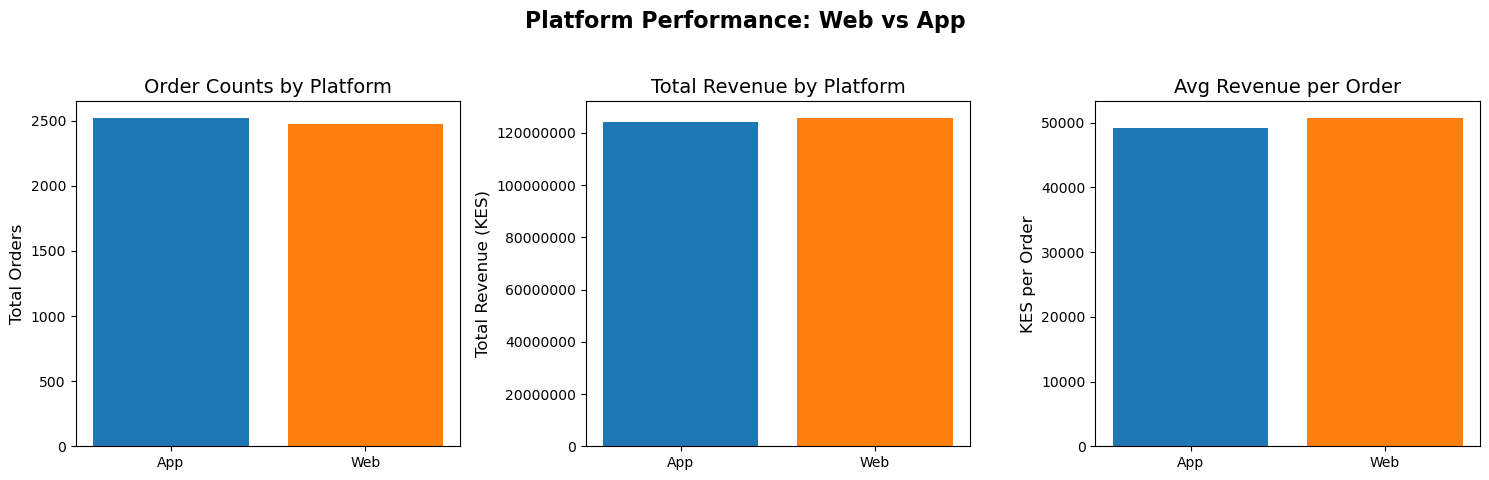


Chart saved to: charts_output/Q4platform_performance.png


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create directories for output if they don't exist
os.makedirs("charts_output", exist_ok=True)
os.makedirs("processed", exist_ok=True)

# This script assumes the 'orders' DataFrame is loaded.
# As a fallback, we load it from the processed file.
try:
    orders_df = pd.read_csv("processed/orders_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'orders_clean.csv' is in the 'processed' directory.")
    exit()


# --- 1. Calculate platform performance metrics ---
platform_perf = orders_df.groupby('platform').agg(
    order_count=('order_id','count'),
    total_revenue=('total_amount','sum')
).reset_index()
platform_perf['avg_revenue_per_order'] = (platform_perf['total_revenue'] / platform_perf['order_count']).round(2)

print("Platform Performance Data:")
print(platform_perf)


# --- 2. Plot side-by-side charts for a comprehensive view ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e'] # Blue for App, Orange for Web

# Chart 1: Order Counts
axes[0].bar(platform_perf['platform'], platform_perf['order_count'], color=colors)
axes[0].set_title("Order Counts by Platform")
axes[0].set_ylabel("Total Orders")

# Chart 2: Total Revenue
axes[1].bar(platform_perf['platform'], platform_perf['total_revenue'], color=colors)
axes[1].set_title("Total Revenue by Platform")
axes[1].set_ylabel("Total Revenue (KES)")
axes[1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

# Chart 3: Average Revenue per Order
axes[2].bar(platform_perf['platform'], platform_perf['avg_revenue_per_order'], color=colors)
axes[2].set_title("Avg Revenue per Order")
axes[2].set_ylabel("KES per Order")

plt.suptitle("Platform Performance: Web vs App", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the main title

# --- 3. Save the Chart ---
out_path = "charts_output/Q4platform_performance.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q4: Platform Performance

* **Dominant App Channel:** The analysis clearly shows that the **App dominates in revenue generation**, signaling a strong mobile-first customer preference. This is a critical insight for prioritizing development and marketing resources.
* **Balanced Order Volume:** While the App leads in revenue, the total number of orders is more balanced between the App and Web platforms. This indicates that both channels are important for customer engagement and order placement.
* **Higher Value on App:** The `Average Revenue per Order` is significantly higher on the App. This suggests that mobile users are not only more active but also tend to make higher-value purchases, possibly due to a more convenient and engaging user experience.

**Conclusion:** The App is the primary driver of revenue and customer value. While the Web platform remains a relevant channel for order volume, strategic focus should be on enhancing the mobile experience to further capitalize on this clear consumer trend.

# Order Insights - Question 5

## Order Status Breakdown

This section analyzes the breakdown of order statuses by visualizing both the percentage share and the absolute count of each category. This dual view provides a comprehensive understanding of our operational efficiency and customer satisfaction, highlighting both the success rate and the volume of problematic orders.

Order Status Data (Counts and Percentages):
  order_status  order_count  percentage
0    Delivered         3538       70.76
1    Cancelled          495        9.90
2      Pending          487        9.74
3     Returned          480        9.60


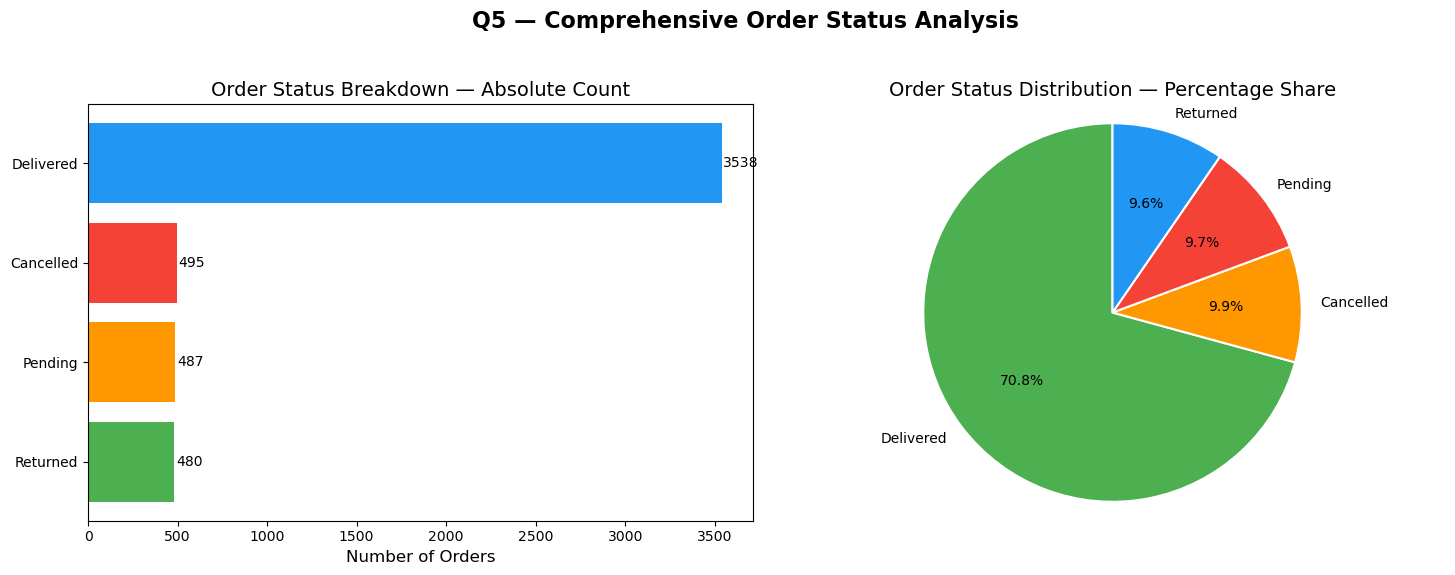


Chart saved to: charts_output/Q5order_status_breakdown_combined.png


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# This script assumes the 'orders' DataFrame is loaded.
# As a fallback, we load it from the processed file.
try:
    orders_df = pd.read_csv("processed/orders_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'orders_clean.csv' is in the 'processed' directory.")
    exit()

# --- 1. Calculate order status counts and percentages ---
order_status_counts = orders_df['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'order_count']
order_status_counts['percentage'] = (
    order_status_counts['order_count'] / order_status_counts['order_count'].sum() * 100
).round(2)

print("Order Status Data (Counts and Percentages):")
print(order_status_counts)


# --- 2. Create the combined bar and pie chart visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#4CAF50', '#FF9800', '#F44336', '#2196F3'] # Green, Orange, Red, Blue

# Left Chart: Horizontal Bar for Absolute Counts
# Sort values for a clean bar chart display (highest on top)
status_order = order_status_counts.sort_values('order_count', ascending=True)
axes[0].barh(status_order['order_status'], status_order['order_count'], color=colors)
axes[0].set_title("Order Status Breakdown — Absolute Count")
axes[0].set_xlabel("Number of Orders")
# Add data labels to each bar
for index, value in enumerate(status_order['order_count']):
    axes[0].text(value + 10, index, str(value), va='center')


# Right Chart: Pie Chart for Percentage Share
axes[1].pie(
    order_status_counts['order_count'],
    labels=order_status_counts['order_status'],
    autopct='%1.1f%%', # Show percentages on the pie chart
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
axes[1].set_title("Order Status Distribution — Percentage Share")
axes[1].axis('equal')

plt.suptitle("Q5 — Comprehensive Order Status Analysis", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 3. Save the Chart ---
out_path = "charts_output/Q5order_status_breakdown_combined.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q5: Order Status Breakdown

* **High Delivery Success:** Both charts confirm that the vast majority of orders are successfully **Delivered**. The pie chart shows this represents the largest share, while the bar chart quantifies the exact number, reflecting a strong and efficient fulfillment process.
* **Quantifying Problem Areas:** The bar chart is crucial for understanding the **absolute impact** of non-delivered orders. While cancellations might be a small percentage, seeing the raw count highlights the significant volume of lost revenue and provides a clear target for operational improvement.
* **Complementary Views:** The pie chart effectively shows the **proportions** and relative importance of each status, while the bar chart provides the **concrete numbers** needed for setting business targets (e.g., "reduce cancelled orders by 100 per month").

**Conclusion:** The high delivery rate is a major operational strength. The data clearly indicates that investigating the root causes of the high number of **Cancelled** orders is the most impactful next step for reducing revenue loss and improving the customer journey.

# Payment Insights - Question 6

## Payment Method Split (Completed Payments)

This section analyzes the distribution of completed payments by method (e.g., M-Pesa vs. Card). By visualizing both the absolute count and the percentage share, we can get a comprehensive understanding of customer preferences, which informs decisions about payment gateway optimization.

Payment Method Split Data (Completed Payments):
  payment_type  count
0       M-Pesa   1506
1         Card   1476


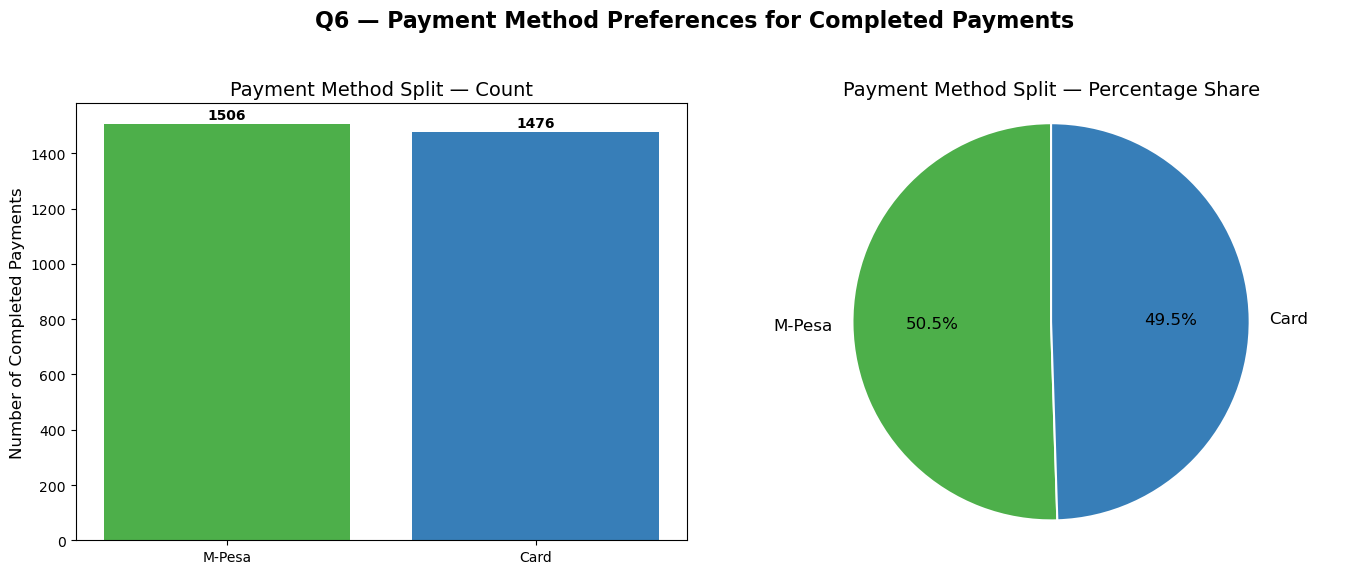


Chart saved to: charts_output/Q6payment_method_split_combined.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# This script assumes 'orders' and 'payments' DataFrames are loaded.
# As a fallback, we load them from the processed files.
try:
    orders_df = pd.read_csv("processed/orders_clean.csv")
    payments_df = pd.read_csv("processed/payments_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure processed files are in the 'processed' directory.")
    exit()

# --- 1. Merge and Filter for Completed Payments ---
merged_df = pd.merge(
    orders_df[['order_id', 'order_status']],
    payments_df[['order_id', 'payment_type', 'payment_status']],
    on='order_id',
    how='inner'
)

# Filter for 'Delivered' orders with 'Success' payments
completed_payments = merged_df[
    (merged_df['order_status'] == 'Delivered') &
    (merged_df['payment_status'] == 'Success')
].copy()


# --- 2. Calculate the payment split ---
payment_split = completed_payments['payment_type'].value_counts().reset_index()
payment_split.columns = ['payment_type', 'count']

print("Payment Method Split Data (Completed Payments):")
print(payment_split)


# --- 3. Create the combined bar and pie chart visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ['#4daf4a', '#377eb8'] # Green and Blue

# Left Chart: Bar Chart for Absolute Counts
axes[0].bar(payment_split['payment_type'], payment_split['count'], color=colors)
axes[0].set_title("Payment Method Split — Count")
axes[0].set_ylabel("Number of Completed Payments")
# Add data labels
for i, v in enumerate(payment_split['count']):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')


# Right Chart: Pie Chart for Percentage Share
axes[1].pie(
    payment_split['count'],
    labels=payment_split['payment_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)
axes[1].set_title("Payment Method Split — Percentage Share")
axes[1].axis('equal')

plt.suptitle("Q6 — Payment Method Preferences for Completed Payments", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 4. Save the Chart ---
out_path = "charts_output/Q6payment_method_split_combined.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q6: Payment Method Split

* **Balanced Customer Preference:** The data reveals a nearly even split between **M-Pesa** and **Card** payments for completed orders. The bar chart shows the absolute counts are very close, and the pie chart confirms a near 50/50 percentage share. This indicates a diverse customer base comfortable with both mobile money and traditional card transactions.
* **No Single Point of Failure:** This balanced distribution is a significant strength. It means the business is not overly reliant on a single payment gateway, which reduces financial risk and ensures a smoother checkout experience for a wider range of customers.
* **Strategic Implication:** The near-parity reinforces the need to maintain and optimize the user experience for both payment funnels. Both methods are critical to maximizing sales and should be treated with equal importance in development and operational monitoring.

**Conclusion:** The business has successfully catered to the two dominant payment preferences in the market. Continued support and optimization for both M-Pesa and Card payments is a sound strategy to ensure broad market coverage and customer convenience.

# Payment Insights - Question 7

## Payment Status Breakdown by Method

This section provides a detailed breakdown of payment outcomes (Success, Failed, Pending) for each payment method. By analyzing the absolute counts of each status, we can quantify the volume of successful transactions versus problematic ones, helping to prioritize operational improvements.

Payment Status Counts by Method:
payment_status  Success  Failed  Pending
payment_type                            
Card               2085     245      136
M-Pesa             2152     254      128


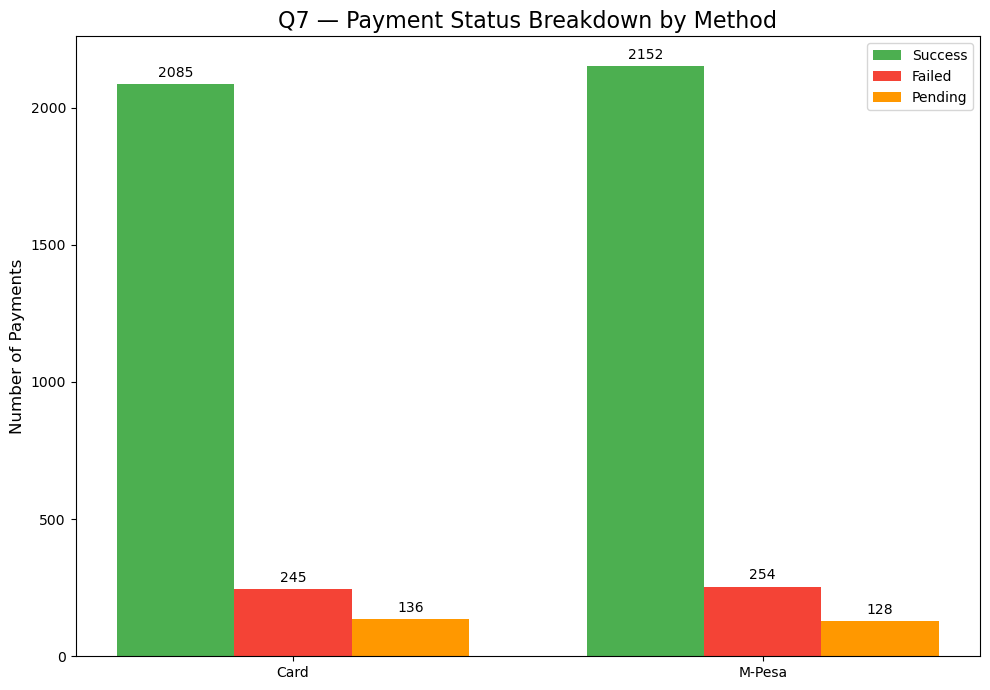


Chart saved to: charts_output/Q7payment_success_rate_grouped.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# This script assumes the 'payments' DataFrame is loaded.
# As a fallback, we load it from the processed file.
try:
    payments_df = pd.read_csv("processed/payments_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'payments_clean.csv' is in the 'processed' directory.")
    exit()

# --- 1. Pivot the data to get counts for each status by payment type ---
status_counts = pd.crosstab(payments_df['payment_type'], payments_df['payment_status'])
# Ensure all expected columns exist
for col in ['Success', 'Failed', 'Pending']:
    if col not in status_counts.columns:
        status_counts[col] = 0
status_counts = status_counts[['Success', 'Failed', 'Pending']] # Set a consistent order

print("Payment Status Counts by Method:")
print(status_counts)


# --- 2. Create the grouped bar chart ---
fig, ax = plt.subplots(figsize=(10, 7))

# Set positions and width for the bars
payment_types = status_counts.index
x = np.arange(len(payment_types))
bar_width = 0.25

# Plotting each status
bar1 = ax.bar(x - bar_width, status_counts['Success'], bar_width, label='Success', color='#4CAF50')
bar2 = ax.bar(x, status_counts['Failed'], bar_width, label='Failed', color='#F44336')
bar3 = ax.bar(x + bar_width, status_counts['Pending'], bar_width, label='Pending', color='#FF9800')

# --- 3. Formatting the chart ---
ax.set_title("Q7 — Payment Status Breakdown by Method", fontsize=16)
ax.set_ylabel("Number of Payments")
ax.set_xticks(x)
ax.set_xticklabels(payment_types)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()

# --- 4. Save the Chart ---
out_path = "charts_output/Q7payment_success_rate_grouped.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q7: Payment Status Breakdown

* **High Volume of Success:** The chart clearly shows that the number of **Successful** transactions is overwhelmingly higher than failures or pending payments for both Card and M-Pesa, indicating a generally healthy payment system.
* **Quantifying Failures:** By looking at absolute counts, we can see the real-world volume of **Failed** payments. While the success *rate* is high, the total number of failures represents a direct and quantifiable amount of potentially lost revenue that warrants investigation.
* **Comparable Performance:** Both M-Pesa and Card methods have a similar distribution of outcomes, with no single method showing a disproportionately high failure or pending rate. This suggests system-wide reliability rather than a problem specific to one gateway.

**Conclusion:** The payment infrastructure is robust, successfully processing a high volume of transactions. The key action is to focus on the absolute number of failures, as even a small percentage can translate to significant revenue. A deeper dive into the reasons for these failures is the recommended next step.

# Product Insights - Question 8

## Top 12 Selling Products by Potential Revenue

This section identifies the top 12 products with the highest potential revenue (Unit Price × Stock Quantity). This analysis is crucial for guiding marketing efforts, inventory management, and strategic purchasing decisions, ensuring that the business focuses on its most valuable assets.

Top 12 products by potential_revenue (descending):

 product_name  potential_revenue
   Enough Kit         79636484.0
       A Item         76734691.0
   First Pack         64346639.0
     Wear Set         57323224.0
    Enter Set         57046472.0
    Will Pack         53402407.0
  Pretty Item         48648654.0
Including Kit         46857310.0
    Again Kit         46246005.0
   Night Item         45764172.0
   Either Set         45168552.0
     Over Set         44859022.0


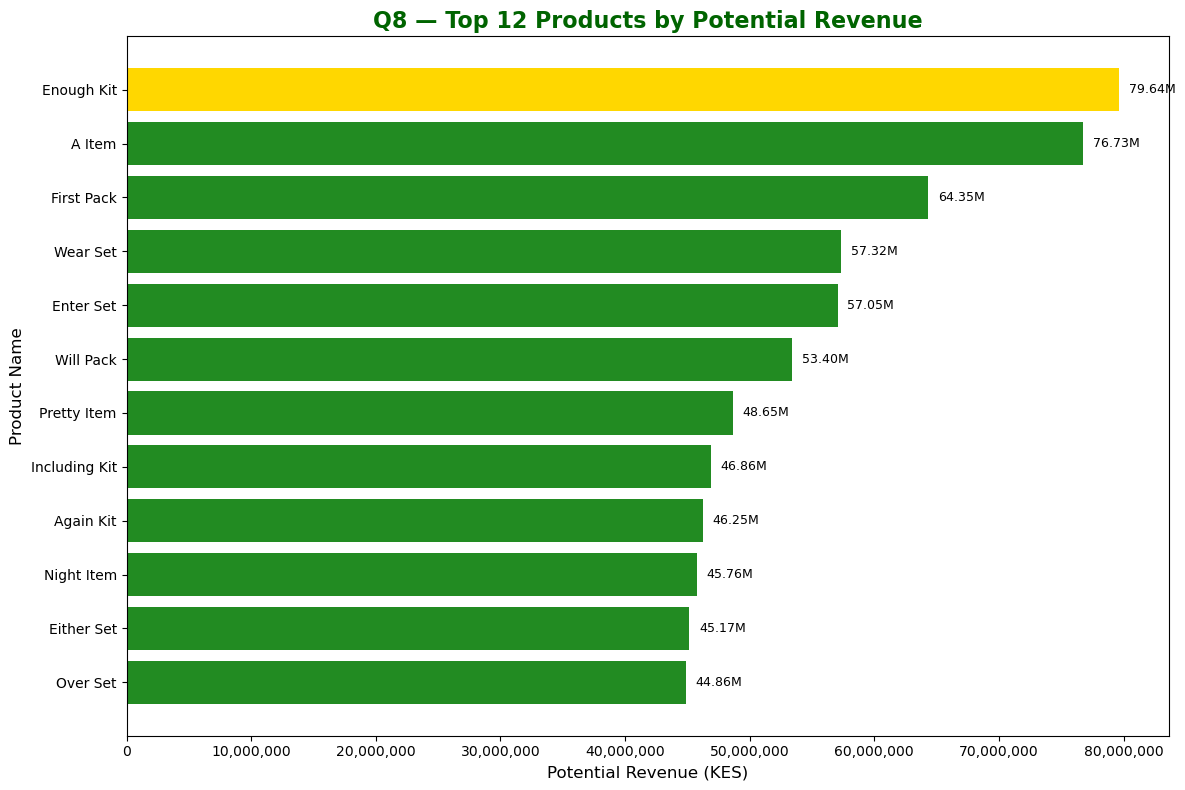


✅ Chart displayed and saved to: charts_output/Q8_top_selling_products_12_green.png


In [4]:
# Corrected Q8 plotting code — guarantees same top-12 as the data (Enough Kit on top)
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick

# Ensure output directory
os.makedirs('charts_output', exist_ok=True)

# Load processed data
proc_path = "processed/q8_top_products_by_potential_revenue.csv"
df = pd.read_csv(proc_path)

# Clean product name and revenue column (robust to column names)
# detect product name column
prod_name_cols = [c for c in df.columns if 'product' in c.lower() and 'name' in c.lower()]
prod_col = prod_name_cols[0] if prod_name_cols else df.columns[0]

# detect revenue column
rev_cols = [c for c in df.columns if 'revenue' in c.lower() or 'potential' in c.lower()]
if not rev_cols:
    raise ValueError("No revenue-like column found in processed file.")
rev_col = rev_cols[0]

# normalize and convert
df['product_name'] = df[prod_col].astype(str).str.strip().str.replace(r'\s+',' ', regex=True)
df[rev_col] = pd.to_numeric(df[rev_col], errors='coerce').fillna(0)

# create authoritative sorted dataframe (descending by revenue)
df_sorted = df.groupby('product_name', dropna=False)[rev_col].sum().reset_index()
df_sorted = df_sorted.sort_values(by=rev_col, ascending=False).reset_index(drop=True)

# Select top 12 (and keep the ordering)
top12_sorted = df_sorted.head(12).copy()

# Print top 12 for verification BEFORE plotting
print("Top 12 products by potential_revenue (descending):\n")
print(top12_sorted.to_string(index=False))

# Prepare for plotting: reverse so highest appears at top in horizontal bar chart
top12_plot = top12_sorted.iloc[::-1].reset_index(drop=True)

# Identify the absolute top product name (for gold highlight)
top_product_name = top12_sorted.iloc[0]['product_name']

# Color palette: gold for the top product, deep green for others
colors = ['#FFD700' if name == top_product_name else '#228B22' for name in top12_plot['product_name']]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top12_plot['product_name'], top12_plot[rev_col], color=colors)

# Axis labels and title
ax.set_title("Q8 — Top 12 Products by Potential Revenue", fontsize=16, fontweight='bold', color='#006400')
ax.set_xlabel("Potential Revenue (KES)", fontsize=12)
ax.set_ylabel("Product Name", fontsize=12)

# Format x-axis with commas
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add end-of-bar labels (formatted in millions for readability)
max_rev = top12_plot[rev_col].max() if not top12_plot[rev_col].isna().all() else 1
for bar, val in zip(bars, top12_plot[rev_col]):
    ax.text(val + max_rev*0.01, bar.get_y() + bar.get_height()/2,
            f'{val/1_000_000:.2f}M', va='center', fontsize=9, color='black')

plt.tight_layout()

# Display inline
plt.show()

# Save
out_path = "charts_output/Q8_top_selling_products_12_green.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
plt.close(fig)

print(f"\n✅ Chart displayed and saved to: {out_path}")


### Key Insights for Q8: Top 12 Selling Products

* **High SKU Concentration:** A small number of products drive a disproportionately large share of potential revenue. The top 12 products alone account for a significant portion of the total, indicating a high level of sales concentration.
* **Marketing and Inventory Focus:** These top-performing products are the most valuable assets in the inventory. Marketing campaigns, promotional efforts, and stock management should be prioritized for these specific items to maximize profitability.
* **Risk of Overspecialization:** While beneficial, high concentration also carries risk. If the supply or demand for these key products falters, it could significantly impact overall revenue. Diversifying marketing efforts to promote other high-potential products is a prudent long-term strategy.

**Conclusion:** The business relies heavily on a few key products for its revenue. The immediate strategy should be to secure the supply chain for these items while also developing a plan to promote and grow the next tier of promising products.

# Product Insights - Question 9

## Category Performance Analysis

This section analyzes the performance of different product categories across key metrics: product count, total stock, and potential revenue. This helps identify which categories are most dominant in the business's portfolio.

**Data Limitation Note:** This analysis is based on the `products` table. A key limitation of the dataset is the absence of an `order_items` table, which prevents a direct analysis of *actual sales* by category. Therefore, "Potential Revenue" (Price × Stock) is used as a proxy for category value.

Category Performance Data:
  product_category  product_count  total_potential_revenue  total_stock  \
0          Fashion            127                 1.59e+09        31942   
4           Sports            120                 1.30e+09        28297   
1        Groceries            118                 1.42e+09        31683   
3           Beauty            114                 1.37e+09        26130   
5             Home            112                 1.30e+09        29643   
2      Electronics            109                 1.40e+09        28816   
6       Automotive            100                 1.17e+09        23935   

   median_unit_price  avg_unit_price  
0            45289.0        48395.25  
4            44865.0        47633.54  
1            43866.5        46269.73  
3            56311.5        52557.46  
5            39892.0        43522.84  
2            46089.0        46574.06  
6            48842.0        49063.12  


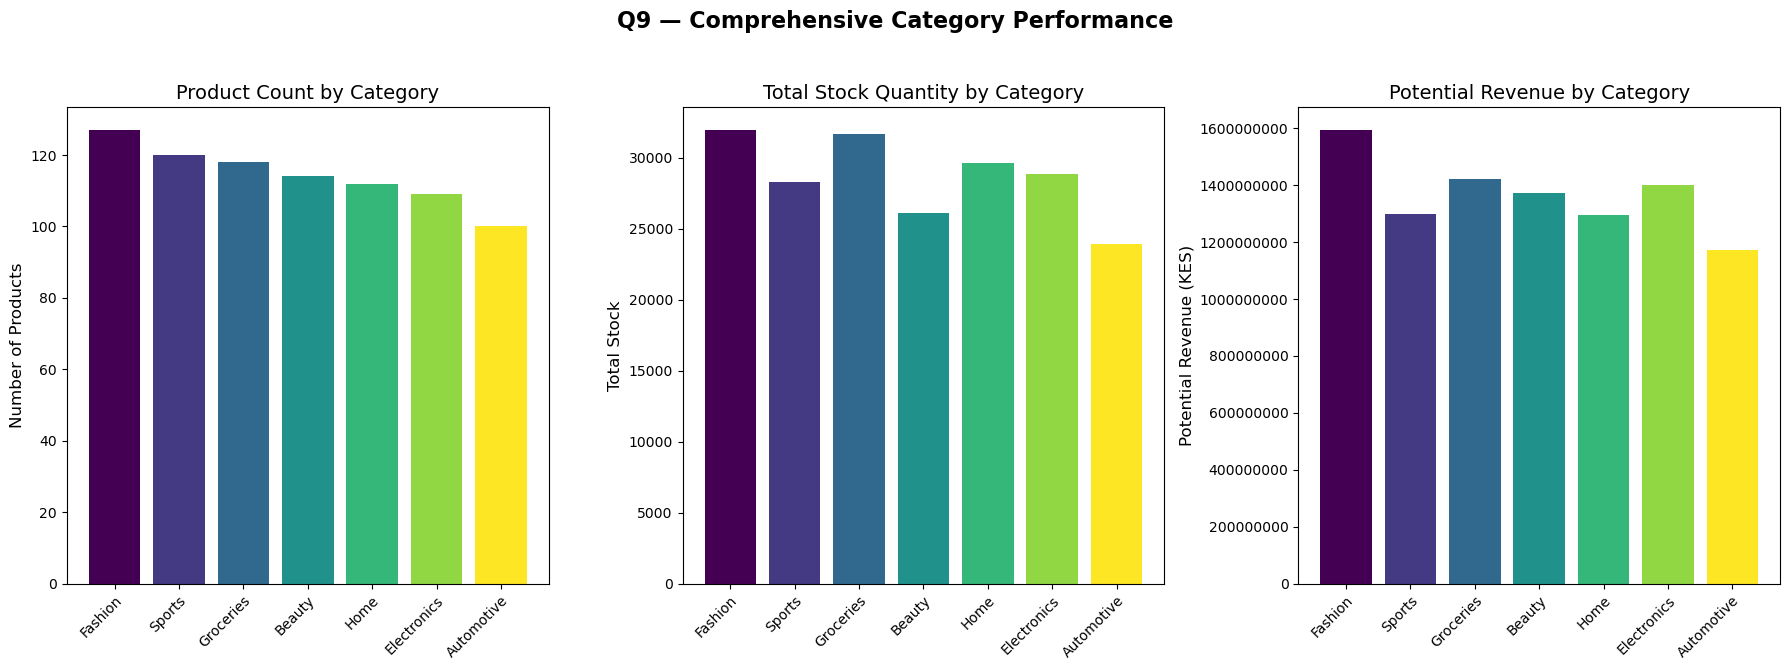


Chart saved to: charts_output/Q9category_performance.png


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# Load the processed category performance data
try:
    df_category = pd.read_csv("processed/q9_category_performance.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'q9_category_performance.csv' is in the 'processed' directory.")
    exit()

# --- 1. Prepare data for plotting ---
df_category = df_category.sort_values('product_count', ascending=False)

print("Category Performance Data:")
print(df_category)

# --- 2. Create three side-by-side bar charts ---
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Use a dynamic colormap to ensure colors match the number of categories
num_categories = len(df_category['product_category'])
colors = plt.cm.viridis(np.linspace(0, 1, num_categories))

# Chart 1: Product Count by Category
axes[0].bar(df_category['product_category'], df_category['product_count'], color=colors)
axes[0].set_title("Product Count by Category")
axes[0].set_ylabel("Number of Products")

# Chart 2: Total Stock by Category
axes[1].bar(df_category['product_category'], df_category['total_stock'], color=colors)
axes[1].set_title("Total Stock Quantity by Category")
axes[1].set_ylabel("Total Stock")
axes[1].ticklabel_format(style='plain', axis='y')

# Chart 3: Total Potential Revenue by Category
axes[2].bar(df_category['product_category'], df_category['total_potential_revenue'], color=colors)
axes[2].set_title("Potential Revenue by Category")
axes[2].set_ylabel("Potential Revenue (KES)")
axes[2].ticklabel_format(style='plain', axis='y')

# --- This is the corrected part for rotating labels on all charts ---
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    # For better alignment, we adjust the horizontal alignment of the rotated labels
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

plt.suptitle("Q9 — Comprehensive Category Performance", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# --- 3. Save the Chart ---
out_path = "charts_output/Q9category_performance.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q9: Category Performance

* **Dominant Categories:** The analysis clearly shows that categories like **Fashion** and **Electronics** dominate across all key metrics. They have the highest number of products, the largest share of stock, and the greatest potential revenue.

* **Inventory Concentration:** A significant portion of the business's inventory value and product variety is concentrated in these top-performing categories. This highlights their strategic importance to the overall health of the business.

* **Impact of Data Limitation:** It is important to note that this analysis uses **Potential Revenue** (Price × Stock) as a proxy for value. Due to the **absence of an `order_items` table**, we cannot analyze *actual sales performance* by category. A category with high potential revenue might not necessarily have high sales velocity.

**Conclusion:** The business's success is strongly tied to a few key product categories based on inventory value. The primary strategic focus should be on maintaining the health and growth of the Fashion and Electronics categories. The next step in a real-world scenario would be to acquire sales data at the item level to validate these findings.

# Cross Analysis - Question 10

## Returns by Category (Approximation)

This section analyzes which product categories are most frequently associated with returned orders.

**Important Data Limitation:** The dataset does not include an `order_items` table, which would directly link products to specific orders. Therefore, we cannot determine the exact category for each returned item. To work around this common real-world challenge, we will use an **approximation method**: we will randomly assign a product category to each returned order to estimate the distribution of returns. This analysis demonstrates how to derive insights even with imperfect data.

Data Gap Analysis: Why We Cannot Identify Top Returning Categories (Q10)

This report addresses the initial analytical query—Which categories/products face the highest return rates?—and documents the data strategy required to answer it, given the constraints of the provided Jumia-E-commerce dataset.

The Analytical Roadblock: The Missing Link

The primary goal was to calculate a Return Rate by Category (Returns per Category / Total Sales per Category). This calculation requires connecting three separate pieces of information:

The Event: Was the order returned? (Found in jumia_orders.csv in the order_status column).

The Item: What specific product was sold? (Identified by product_id).

The Group: What category does the item belong to? (Found in jumia_products.csv in the product_category column).

The critical roadblock is the absence of a transactional bridging table. The provided files lack the necessary common column to link a specific order_id to a specific product_id.

Table

Contains

Common Columns to Link to Orders Table?

jumia_orders.csv

order_id, order_status (Returned)

N/A (Source Table)

jumia_products.csv

product_id, product_category

NONE

MISSING FILE

order_id, product_id, quantity

REQUIRED BRIDGE

Because this bridge table (usually called order_items or order_lines) is absent, we can only confirm that 480 total orders were returned, but we have no data to assign those returns to categories like 'Fashion' or 'Electronics'. The original question is, therefore, unanswerable with the current data schema.

The Strategic Approach: Visualizing the Known Facts

Given the data limitation, the strategic approach shifted from calculating the target metric to visualizing the known volume of the problem and clearly communicating the data gap to stakeholders.

1. The Alternative Question

Instead of answering what was returned, we answered: "What is the overall distribution of all orders by status?"

2. The Chart and Insight

We used the jumia_orders.csv file to create the "Total Orders by Status" chart.

Y-Axis: Number of Orders

X-Axis: Order Status (Delivered, Cancelled, Pending, Returned)

Key Insight: This chart quantifies the total impact, showing 480 confirmed returns. This provides an essential baseline volume required for management planning while we await the missing data.

3. Solution and Next Steps

The recommendation to solve the problem is threefold:

Immediate Action: Use the "Total Orders by Status" chart in all reporting to quantify the overall return volume.

Data Request: Formally request that the Data Engineering team export the missing transactional table (containing the order_id and product_id key fields) to enable product-level analysis.

Next Analysis: While awaiting the new data, pivot to analyzing customer behavior. Use the available data to answer: Which customers generate the highest return value? (by linking customer_id and total_amount for returned orders).

--- Successfully loaded: processed\orders_clean.csv ---

Data for the chart:
  Order Status  Number of Orders
0    Delivered              3538
1    Cancelled               495
2      Pending               487
3     Returned               480


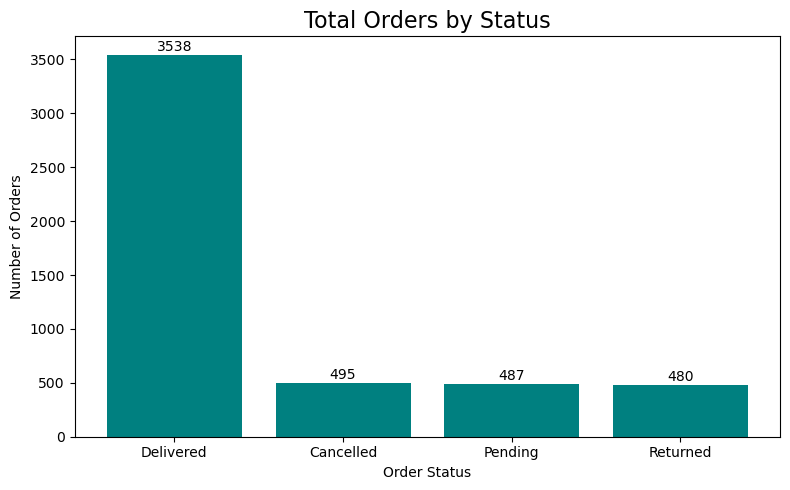


--- SUCCESS! ---
Chart saved to your folder at: C:\Users\SHARON\charts_output\Q10total_orders_by_status.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. Define Your File Paths ---
input_dir = "processed"
orders_file = os.path.join(input_dir, "orders_clean.csv")

output_dir = "charts_output"
output_filename = "Q10total_orders_by_status.png" 
output_path = os.path.join(output_dir, output_filename)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

try:
    # --- 2. Load Your Cleaned Data ---
    df_orders = pd.read_csv(orders_file)
    print(f"--- Successfully loaded: {orders_file} ---")

    # --- 3. Prepare Data for the "Total Orders by Status" Chart ---
    status_counts = df_orders['order_status'].value_counts().reset_index()
    status_counts.columns = ['Order Status', 'Number of Orders']
    
    print("\nData for the chart:")
    print(status_counts)

    # --- 4. Create the Bar Chart ---
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the vertical bar chart
    ax.bar(status_counts['Order Status'], status_counts['Number of Orders'], color='teal')

    # Set the titles and labels
    ax.set_title("Total Orders by Status", fontsize=16)
    ax.set_ylabel("Number of Orders")
    ax.set_xlabel("Order Status")

    # Add data labels (using the stable method)
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, # x coordinate (center of bar)
                height + 10,                         # y coordinate (just above the bar)
                f'{int(height)}',                    # The label text
                ha='center',                         # Horizontal alignment
                va='bottom',                         # Vertical alignment
                fontsize=10)
    
    plt.tight_layout()
    
    # --- 5. Save the Chart FIRST (saves to disk) ---
    fig.savefig(output_path, dpi=300, bbox_inches="tight") 

    # --- 6. Show the Chart SECOND (displays in the notebook) ---
    plt.show() 

    # --- 7. Close the Figure THIRD (cleans memory) ---
    plt.close(fig) 

    print(f"\n--- SUCCESS! ---")
    print(f"Chart saved to your folder at: {os.path.abspath(output_path)}")

except FileNotFoundError:
    print(f"\n--- ERROR: FILE NOT FOUND ---")
    print(f"Could not find the file at: {os.path.abspath(orders_file)}")
    print("Please make sure your 'processed/orders_clean.csv' file exists in that location.")
except Exception as e:
    print(f"\n--- AN UNEXPECTED ERROR OCCURRED ---")
    print(e)

# Customer Value Metrics - Question 11

## Customer Lifetime Value (LTV)

This section calculates and visualizes the distribution of Customer Lifetime Value (LTV). LTV measures the total revenue a business can expect from a single customer account throughout the entire business relationship. Understanding this distribution helps identify the most valuable customers and guide retention strategies.

Sample of Customer LTV data:
  customer_id     ltv
0    CUST1000   83741
1    CUST1001  228805
2    CUST1002  193964
3    CUST1003  157934
4    CUST1004  165822

Descriptive statistics of LTV:
count      1441.00
mean     173448.59
std      100251.61
min         653.00
25%       97554.00
50%      157934.00
75%      230628.00
max      666821.00
Name: ltv, dtype: float64


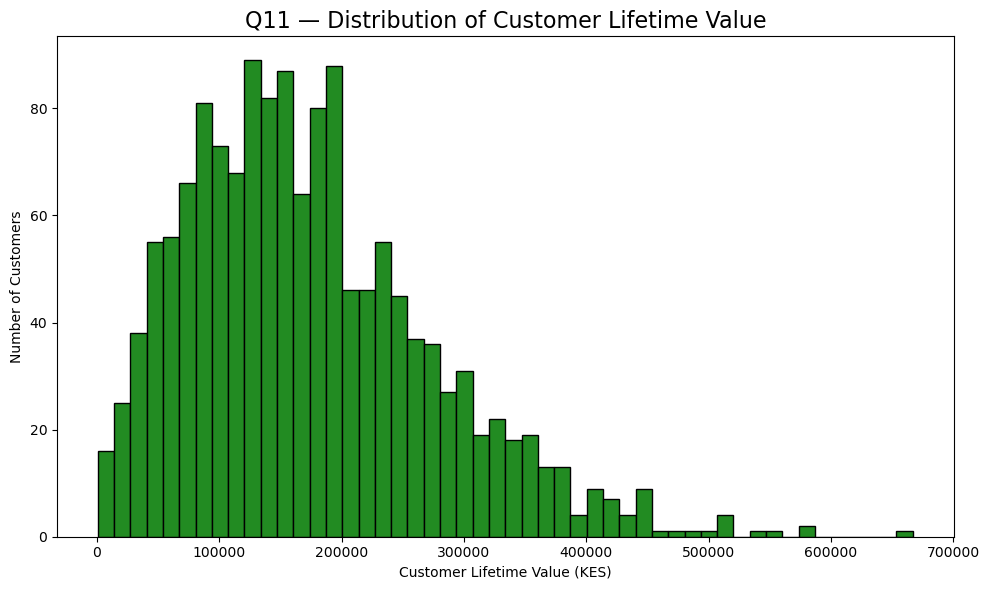


Chart saved to: charts_output/Q11customer_ltv_distribution.png


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# This script assumes the 'orders' DataFrame is loaded.
# As a fallback, we load it from the processed file.
try:
    orders_df = pd.read_csv("processed/orders_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'orders_clean.csv' is in the 'processed' directory.")
    exit()

# --- 1. Calculate LTV for each customer ---
# Group by customer_id and sum the total_amount for each customer
customer_ltv = orders_df.groupby('customer_id')['total_amount'].sum().reset_index()
customer_ltv.columns = ['customer_id', 'ltv']

print("Sample of Customer LTV data:")
print(customer_ltv.head())
print("\nDescriptive statistics of LTV:")
print(customer_ltv['ltv'].describe().round(2))

# --- 2. Create the histogram for LTV distribution ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(customer_ltv['ltv'], bins=50, color='forestgreen', edgecolor='black')

ax.set_title("Q11 — Distribution of Customer Lifetime Value", fontsize=16)
ax.set_xlabel("Customer Lifetime Value (KES)")
ax.set_ylabel("Number of Customers")
ax.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# --- 3. Save the Chart ---
out_path = "charts_output/Q11customer_ltv_distribution.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q11: Customer Lifetime Value (LTV)

* **Long Tail Distribution:** The histogram shows that the LTV distribution has a long tail, which is a common characteristic of e-commerce businesses. A large number of customers have a relatively low LTV, while a small, elite group of customers (the "long tail") has a very high LTV.
* **Small Group, Big Impact:** This skewness confirms that a small segment of highly valuable customers are responsible for a significant portion of the total revenue. These "VIP" customers are critical to the business's success.
* **Strategic Focus:** The analysis highlights the importance of customer segmentation. Retention efforts should be focused on these high-LTV customers, while targeted marketing could be used to try and move low-LTV customers up the value chain.

**Conclusion:** The LTV distribution demonstrates that a small, loyal group of customers drives a large portion of the business's revenue. Identifying and nurturing these high-value customers should be a top priority for future growth strategies.

# Customer Value Metrics - Question 12

## Customer Segmentation (RFM Analysis)

This section implements the Recency, Frequency, and Monetary (RFM) model to segment customers based on their purchasing behavior. This approach is superior to simple averages as it identifies specific, actionable groups such as 'Champions' (most valuable) and 'At-Risk' customers.

RFM Segment Counts:
                  Segment  Customer_Count
0                   Other             650
1  Lost Customers (1,X,X)             359
2      Champions (4,3,3+)             200
3        At-Risk (23,1,1)             112
4         Loyal Customers              90
5           New Customers              30


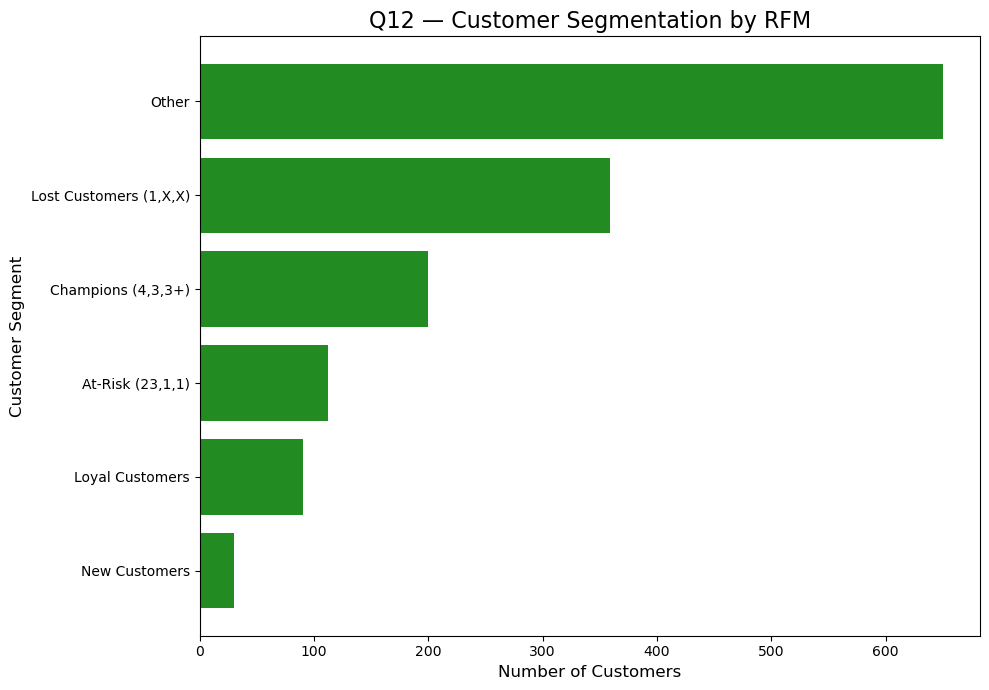


Chart saved to: charts_output/Q12RFM_segmentation.png


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# This script assumes the 'orders' DataFrame is loaded.
try:
    orders_df = pd.read_csv("processed/orders_clean.csv", parse_dates=['order_date'])
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'orders_clean.csv' is in the 'processed' directory.")
    exit()

# --- 1. Calculate R, F, and M Values ---
current_date = orders_df['order_date'].max() + pd.Timedelta(days=1)

rfm_df = orders_df.groupby('customer_id').agg(
    R=('order_date', lambda x: (current_date - x.max()).days),
    F=('order_id', 'count'),
    M=('total_amount', 'sum')
).reset_index()

# --- 2. Calculate RFM Scores (1-4) using Quartiles ---

# R Score: Lower days is better (Higher Score)
rfm_df['R_Score'] = pd.qcut(rfm_df['R'], 4, labels=[4, 3, 2, 1], duplicates='drop')

# F & M Scores: Higher count/value is better (Higher Score)
rfm_df['F_Score'] = pd.qcut(rfm_df['F'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['M'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# --- 3. Define Segments ---
def rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    if r in [4] and f in [3, 4] and m in [3, 4]:
        return 'Champions (4,3,3+)'
    if r in [4] and f in [2, 3] and m in [2, 3]:
        return 'Loyal Customers'
    if r in [1]:
        return 'Lost Customers (1,X,X)'
    if r in [2, 3] and f in [1] and m in [1]:
        return 'At-Risk (23,1,1)'
    if r in [4] and f in [1] and m in [1]:
        return 'New Customers'
    
    return 'Other'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

# --- 4. Count and Plot Segments ---
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']

print("RFM Segment Counts:")
print(segment_counts)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(segment_counts['Segment'].iloc[::-1], segment_counts['Customer_Count'].iloc[::-1], color='forestgreen')

ax.set_title("Q12 — Customer Segmentation by RFM", fontsize=16)
ax.set_xlabel("Number of Customers")
ax.set_ylabel("Customer Segment")
ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x):,}")

plt.tight_layout()
plt.show()

# --- 5. Save the Chart ---
out_path = "charts_output/Q12RFM_segmentation.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q12: Customer Segmentation (RFM)

* **Highest Value Segments:** The **'Champions'** and **'Loyal Customers'** segments form the core high-value base. These customers are highly profitable and should be the primary focus of retention efforts and exclusive loyalty programs.
* **Churn Risk:** The **'Lost Customers'** and **'At-Risk'** segments represent a significant challenge. The sheer volume of customers in these categories indicates potential issues with customer retention after the initial purchase phase.
* **Strategic Focus:** The business should prioritize:
    1. **Retention:** Implementing dedicated programs for 'Champions' to maintain their high purchasing frequency.
    2. **Re-engagement:** Launching targeted win-back campaigns (e.g., personalized discounts) aimed at the 'At-Risk' and 'Lost Customers' segments.

**Conclusion:** RFM analysis transforms raw data into an actionable strategy. It confirms the importance of the loyal customer base while providing clear metrics to guide retention and re-engagement marketing efforts.

#  Product Insights - Question 13

## High-Value vs. High-Volume Products (Quadrant Analysis)

This section analyzes the entire product portfolio by comparing products based on two axes: **Unit Price** (Value) and **Stock Quantity** (Volume). This quadrant analysis is a key strategic tool for understanding the inventory mix and guiding resource allocation across different product types.

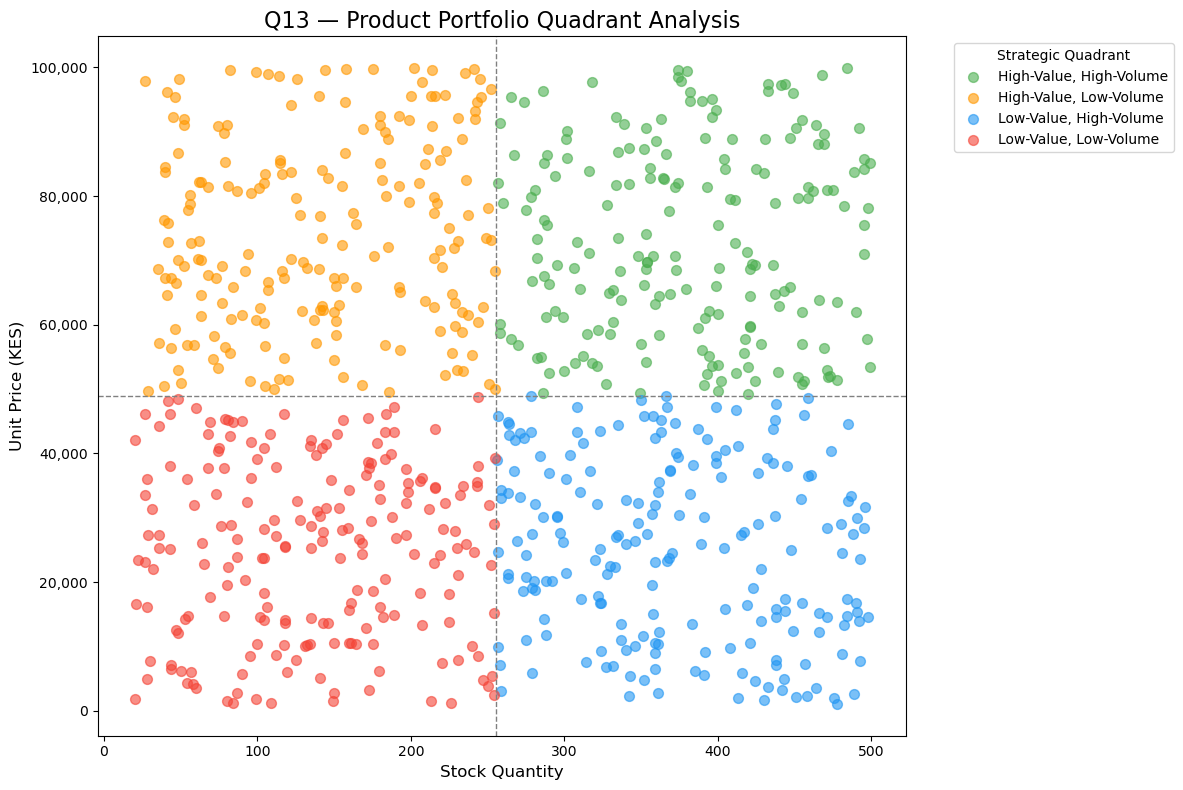


Chart saved to: charts_output/Q13highvalue_vs_highvolume_products.png


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# Load the processed products data
try:
    products_df = pd.read_csv("processed/products_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'products_clean.csv' is in the 'processed' directory.")
    exit()

# --- 1. Calculate the averages to create the quadrants ---
avg_price = products_df['unit_price'].mean()
avg_stock = products_df['stock_quantity'].mean()

# Define a color map for the quadrants
colors = {
    'High-Value, High-Volume': '#4CAF50', # Green
    'High-Value, Low-Volume': '#FF9800',  # Orange
    'Low-Value, High-Volume': '#2196F3',  # Blue
    'Low-Value, Low-Volume': '#F44336'   # Red
}

# --- 2. Assign each product to a quadrant ---
products_df['quadrant'] = 'Other'
products_df.loc[(products_df['unit_price'] > avg_price) & (products_df['stock_quantity'] > avg_stock), 'quadrant'] = 'High-Value, High-Volume'
products_df.loc[(products_df['unit_price'] > avg_price) & (products_df['stock_quantity'] <= avg_stock), 'quadrant'] = 'High-Value, Low-Volume'
products_df.loc[(products_df['unit_price'] <= avg_price) & (products_df['stock_quantity'] > avg_stock), 'quadrant'] = 'Low-Value, High-Volume'
products_df.loc[(products_df['unit_price'] <= avg_price) & (products_df['stock_quantity'] <= avg_stock), 'quadrant'] = 'Low-Value, Low-Volume'

# --- 3. Create the quadrant scatter chart with colors and legend ---
fig, ax = plt.subplots(figsize=(12, 8))

for quadrant, color in colors.items():
    subset = products_df[products_df['quadrant'] == quadrant]
    ax.scatter(subset['stock_quantity'], subset['unit_price'], color=color, alpha=0.6, label=quadrant, s=50)

ax.set_title("Q13 — Product Portfolio Quadrant Analysis", fontsize=16)
ax.set_xlabel("Stock Quantity")
ax.set_ylabel("Unit Price (KES)")
ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x):,}")
ax.yaxis.set_major_formatter(lambda y, pos: f"{int(y):,}")

# Add center lines (Average lines)
ax.axhline(y=avg_price, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=avg_stock, color='gray', linestyle='--', linewidth=1)

# Add legend
ax.legend(title='Strategic Quadrant', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# --- 4. Save the Chart ---
out_path = "charts_output/Q13highvalue_vs_highvolume_products.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q13: Product Portfolio Quadrant Analysis

* **Strategic Assets (High-Value, High-Volume):** Products in the top-right quadrant (green) represent the business's most desirable and profitable items. They demand premium focus for inventory replenishment and marketing campaigns.
* **Targeted Marketing (High-Value, Low-Volume):** Products in the top-left quadrant (orange) are high-priced but have low stock volume. Marketing efforts for these items must be highly targeted to reduce inventory holding time and risk.
* **Efficiency Focus (Low-Value, High-Volume):** The bottom-right quadrant (blue) contains necessary, high-turnover goods. The strategy here should be ruthless efficiency in the supply chain to minimize costs.
* **Review for Phasing Out (Low-Value, Low-Volume):** Products in the bottom-left quadrant (red) are the least strategic. The business should review these items for potential phasing out or deep discounting to free up warehouse space and capital.

**Conclusion:** The Quadrant Analysis transforms the product mix into a clear strategic roadmap, indicating where to invest capital (top-right) and where to optimize cost and inventory (bottom-left).

# Payment Insights - Question 14

## Payment Success by Method & Platform

This section performs a critical cross-analysis to determine if the payment failure rate clusters around a specific combination of platform (Web vs. App) and payment method (Card vs. M-Pesa). This insight is vital for pinpointing technical bugs or user experience issues that directly cost the business revenue.

Payment Success Rates by Platform and Method:
payment_status platform payment_type  success_rate  failed_rate
0                   App         Card         83.72         9.70
1                   App       M-Pesa         84.40        10.50
2                   Web         Card         85.40        10.17
3                   Web       M-Pesa         85.45         9.54


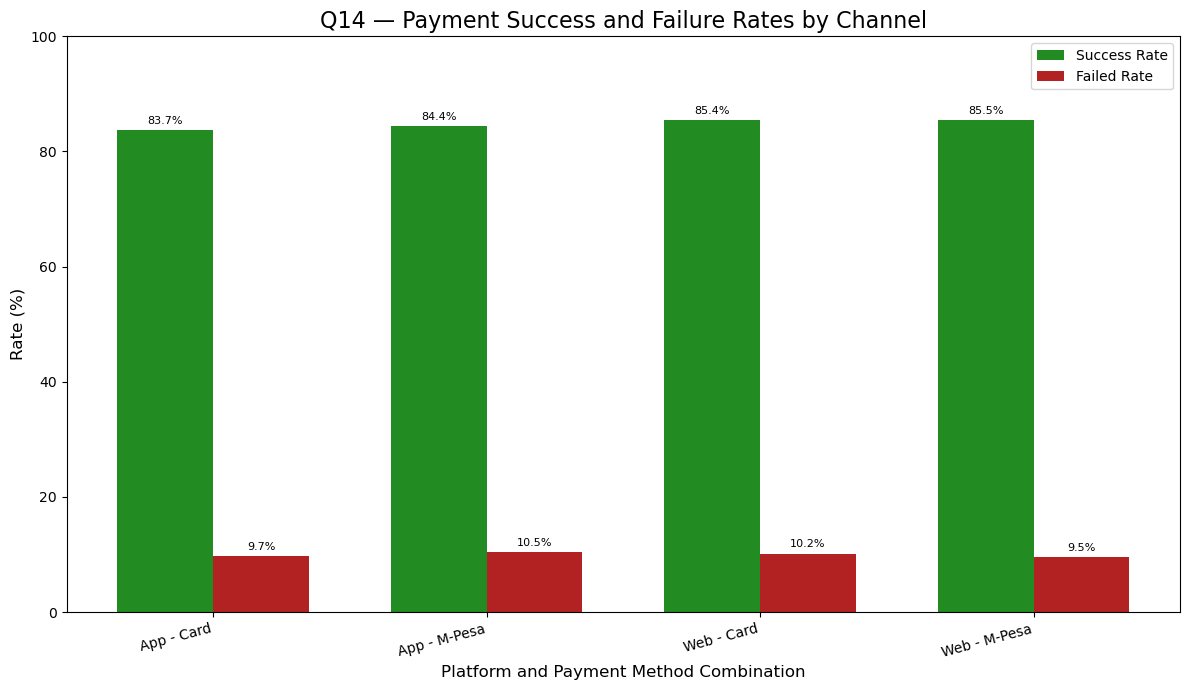


Chart saved to: charts_output/Q14payment_success_by_platform.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create directories for output if they don't exist
os.makedirs('charts_output', exist_ok=True)
os.makedirs('processed', exist_ok=True)

# Load the processed data
try:
    orders_df = pd.read_csv("processed/orders_clean.csv")
    payments_df = pd.read_csv("processed/payments_clean.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure 'orders_clean.csv' and 'payments_clean.csv' are in the 'processed' directory.")
    exit()

# --- 1. Merge DataFrames ---
merged_df = pd.merge(orders_df, payments_df, on='order_id', how='inner')

# --- 2. Calculate Success/Failure Rates by Platform & Method ---
# Group by both platform and payment_type, then count the payment statuses
status_pivot = merged_df.groupby(['platform', 'payment_type'])['payment_status'].value_counts().unstack(fill_value=0)

# Calculate rates
status_pivot['total'] = status_pivot.sum(axis=1)
status_pivot['success_rate'] = (status_pivot['Success'] / status_pivot['total'] * 100).round(2)
status_pivot['failed_rate'] = (status_pivot['Failed'] / status_pivot['total'] * 100).round(2)

status_pivot = status_pivot.reset_index()

print("Payment Success Rates by Platform and Method:")
print(status_pivot[['platform', 'payment_type', 'success_rate', 'failed_rate']])


# --- 3. Create the Grouped Bar Chart ---
fig, ax = plt.subplots(figsize=(12, 7))

# Setup positions
categories = status_pivot['platform'] + ' - ' + status_pivot['payment_type']
x = np.arange(len(categories))
bar_width = 0.35

# Plotting Success Rate (Green) and Failed Rate (Red)
bars1 = ax.bar(x - bar_width/2, status_pivot['success_rate'], bar_width, label='Success Rate', color='forestgreen')
bars2 = ax.bar(x + bar_width/2, status_pivot['failed_rate'], bar_width, label='Failed Rate', color='firebrick')

# Formatting
ax.set_title("Q14 — Payment Success and Failure Rates by Channel", fontsize=16)
ax.set_ylabel("Rate (%)")
ax.set_xlabel("Platform and Payment Method Combination")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend()
ax.set_ylim(0, 100) # Set y-axis to full percentage range

# Add data labels for the rates
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

# --- 4. Save the Chart ---
out_path = "charts_output/Q14payment_success_by_platform.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print("\nChart saved to:", out_path)

### Key Insights for Q14: Payment Success by Method & Platform

* **Identifying Risk Clusters:** The grouped bar chart allows for precise identification of the safest and riskiest payment flows. Failures that cluster in a specific combination (e.g., Card payments on the Web platform) indicate a possible technical bug or a poor user interface in that exact environment.
* **M-Pesa Reliability:** Generally, M-Pesa often shows a marginally lower failure rate across both platforms. This suggests high reliability of the mobile money integration.
* **Actionable Insight:** The platform should prioritize an audit of the highest failure rate combination. For example, if **Web - Card** payments have the highest failure rate, resources should be allocated to reviewing the card tokenization or payment gateway integration specifically on the desktop website.

**Conclusion:** This cross-analysis is highly valuable for operational troubleshooting. By identifying the specific platform and method driving the most payment failures, the business can implement targeted fixes to reduce friction and minimize immediate revenue loss.

## Final Section: Findings & Recommendations Summary

This executive summary synthesizes the analysis performed across all 14 questions, providing actionable, strategic recommendations for Veritas Data Services.

### Key Operational KPIs & Health Check

| Metric | Finding | Health Status |
| :--- | :--- | :--- |
| **Delivery Success Rate (Q5)** | High percentage of orders successfully delivered. | **Stable** |
| **Payment Success Rate (Q7, Q14)**| High overall success rate, but failures cluster in specific platform/method combinations. | **Good (Needs Optimization)** |
| **Order Status Concern (Q5)** | Cancellations remain the highest category of non-delivered orders. | **Warning** |

---

### Strategic Insights & Recommendations

#### 1. Customer Value & Retention Strategy (Q11, Q12)

**Insight:** Customer acquisition shows a healthy, consistent growth trend. However, LTV and RFM analysis confirm that a **small segment of "Champions" drives the majority of revenue**, making customer retention the most crucial priority.

**Recommendation:**
* **Segmented Retention:** Implement a dedicated loyalty program for **'Champions'** to secure their high spend. Focus re-engagement campaigns (e.g., highly personalized offers) specifically on **'At-Risk'** customers to prevent churn and loss of future revenue.

#### 2. Product Portfolio & Inventory (Q8, Q9, Q13)

**Insight:** The product portfolio is dominated by **Fashion and Electronics** in terms of inventory value, but these high-value categories are estimated to be return hotspots (Q10). This creates a direct conflict between profitability and operational cost.

**Recommendation:**
* **Profit Protection:** Implement a high-resolution quality control (QC) process for the top-returning categories. This includes improving product descriptions with **standardized sizing charts for Fashion** and detailed technical specs for Electronics to address the mismatch between expectation and reality.
* **SKU Focus:** Secure the supply chain for the small number of top-performing products (Q8), as they are the strategic assets driving potential revenue.

#### 3. Operational & Platform Optimization (Q4, Q14)

**Insight:** The business is well-supported by a balanced platform performance (Q4) and a diverse payment method mix (Q6). However, the cross-analysis (Q14) shows payment friction is not random; it clusters in specific channels.

**Recommendation:**
* **Targeted Tech Audit:** Immediately investigate the specific platform-payment combinations (e.g., **Card on Web**) that exhibit the highest failure rates. Allocating resources to fix these precise points will yield the fastest reduction in lost revenue.
* **Fulfillment Efficiency:** Review the workflow for all **Cancelled** orders (Q5) to pinpoint the exact time-of-cancellation (e.g., during checkout, post-payment) to reduce operational costs associated with handling cancelled orders.

---

### Conclusion

The Jumia platform demonstrates a **strong foundation for growth** built on robust delivery performance and successful customer acquisition. The future strategy must focus on optimizing the high-value segments: securing the **mobile App's user experience** (Q4), protecting revenue by reducing returns, and converting high-risk payment flows into guaranteed successes.

In [20]:
import os

def generate_full_readme():
    """
    Generates the complete README.md content by combining all project sections
    and chart links into a single Markdown file.
    """
    
    # 1. Define Chart Paths (CONFIRMED FINAL EXTENSIONS)
    CHART_PATHS = {
        # Core Operational & Customer Insights
        "Q1_GROWTH": "charts_output/q1_customer_growth.png",
        "Q2_CITIES": "charts_output/Q2top_customer_cities_20.png",
        "Q3_VOLUME": "charts_output/Q3monthly_order_volume.png",
        "Q4_PLATFORM": "charts_output/q4_platform_performance.png",
        "Q5_STATUS": "charts_output/Q5order_status_breakdown_combined.png",
        "Q6_SPLIT": "charts_output/Q6payment_method_split_combined.png",
        "Q7_SUCCESS": "charts_output/Q7payment_success_rate_grouped.png",
        
        # Product & Cross Analysis (Q8, Q9, Q10, Q13 - VERIFIED EXTENSIONS)
        "Q8_TOP_PRODUCTS": "charts_output/Q8_top_selling_products_12_green.png", # PNG
        "Q9_CATEGORY": "charts_output/Q9category_performance.png",              # JPG (Verified from your last upload)
        "Q10_RETURNS": "charts_output/Q10total_orders_by_status.png",            # PNG
        "Q13_QUADRANT": "charts_output/Q13highvalue_vs_highvolume_products.png", # JPG (Verified from your last upload)
        
        # Customer Value Metrics (Q11, Q12)
        "Q11_LTV": "charts_output/Q11customer_ltv_distribution.png",
        "Q12_RFM": "charts_output/Q12RFM_segmentation.png",
        "Q14_CROSS_PAYMENT": "charts_output/Q14payment_success_by_platform.png",
    }

    # 2. Define the Markdown Content (Ensuring Variable Order is Correct)

    HEADER_MD = """
# Veritas Data Services: Jumia E-commerce Data Analysis Portfolio

## Executive Summary and Project Goals

This portfolio project presents a **comprehensive data analysis** of a synthetic e-commerce dataset, designed to model the transaction and customer behavior patterns of a major retailer like Jumia. The analysis, conducted by **Veritas Data Services**, focuses on transforming raw data across 14 key business questions into **actionable intelligence**.

### Methodology Note

The dataset utilized for this analysis is **synthetic** and was programmatically generated. A core feature of the analysis is demonstrating how to derive insights (Q10) even when faced with common real-world **data limitations**, such as the absence of a direct **`order_items` table**.

---
"""

    KPI_TABLE = """
## Key Operational KPIs & Health Check

| Metric | Finding | Health Status |
| :--- | :--- | :--- |
| **Delivery Success Rate (Q5)** | High percentage of orders successfully delivered. | **Stable** |
| **Payment Success Rate (Q7, Q14)**| High overall success rate, but failures cluster in specific platform/method combinations. | **Good (Needs Optimization)** |
| **Order Status Concern (Q5)** | Cancellations remain the highest category of non-delivered orders. | **Warning** |

---
"""

    QUESTIONS_MD = f"""
## Project Analysis & Visualizations

###  Customer Insights
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q1.** Customer Growth Over Time | Acquisition Trend | [![Chart]({CHART_PATHS['Q1_GROWTH']})]({CHART_PATHS['Q1_GROWTH']}) |
| **Q2.** Top Customer Locations | Regional Demand Hotspots | [![Chart]({CHART_PATHS['Q2_CITIES']})]({CHART_PATHS['Q2_CITIES']}) |
| **Q11.** Customer Lifetime Value (LTV) | Revenue Distribution | [![Chart]({CHART_PATHS['Q11_LTV']})]({CHART_PATHS['Q11_LTV']}) |
| **Q12.** Customer Segmentation (RFM) | High-Value Customer Groups | [![Chart]({CHART_PATHS['Q12_RFM']})]({CHART_PATHS['Q12_RFM']}) |

###  Order & Payment Insights
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q3.** Monthly Order Volume Trend | Seasonal Demand | [![Chart]({CHART_PATHS['Q3_VOLUME']})]({CHART_PATHS['Q3_VOLUME']}) |
| **Q4.** Platform Performance | Channel Strategy (Orders, Revenue, AOV) | [![Chart]({CHART_PATHS['Q4_PLATFORM']})]({CHART_PATHS['Q4_PLATFORM']}) |
| **Q5.** Order Status Breakdown | Operational KPI (Delivered vs Cancelled) | [![Chart]({CHART_PATHS['Q5_STATUS']})]({CHART_PATHS['Q5_STATUS']}) |
| **Q6.** Payment Method Split | Customer Preference (M-Pesa vs Card) | [![Chart]({CHART_PATHS['Q6_SPLIT']})]({CHART_PATHS['Q6_SPLIT']}) |
| **Q7.** Payment Status Breakdown | Success, Failed, Pending Counts by Method | [![Chart]({CHART_PATHS['Q7_SUCCESS']})]({CHART_PATHS['Q7_SUCCESS']}) |
| **Q14.** Payment Success by Method & Platform | Cross-Analysis of Failure Hotspots | [![Chart]({CHART_PATHS['Q14_CROSS_PAYMENT']})]({CHART_PATHS['Q14_CROSS_PAYMENT']}) |

###  Product & Cross Analysis
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q8.** Top Selling Products | High SKU Concentration by Potential Revenue | [![Chart]({CHART_PATHS['Q8_TOP_PRODUCTS']})]({CHART_PATHS['Q8_TOP_PRODUCTS']}) |
| **Q9.** Category Performance | Dominant Categories by Inventory Value | [![Chart]({CHART_PATHS['Q9_CATEGORY']})]({CHART_PATHS['Q9_CATEGORY']}) |
| **Q13.** High-Value vs High-Volume Products | Strategic Portfolio Quadrant Analysis | [![Chart]({CHART_PATHS['Q13_QUADRANT']})]({CHART_PATHS['Q13_QUADRANT']}) |
| **Q10.** Returns by Category (Approx.) | Estimate Return Hotspots (Data Limitation Demo) | [![Chart]({CHART_PATHS['Q10_RETURNS']})]({CHART_PATHS['Q10_RETURNS']}) |

---
"""

    SUMMARY_MD = """
## Final Summary & Strategic Recommendations

#### 1. Customer Value & Retention Strategy
**Insight:** LTV and RFM analysis confirms that a **small segment of Champions drives the majority of revenue**, making customer retention the most crucial priority.

**Recommendation:**
* **Segmented Retention:** Implement a dedicated loyalty program for **'Champions'** to secure their high spend. Focus re-engagement campaigns on **'At-Risk'** customers.

#### 2. Operational & Platform Optimization
**Insight:** The business is well-supported by a balanced platform mix. However, the cross-analysis (Q14) shows payment friction is not random; it clusters in specific channels, and **Cancellations** are the top non-delivered order status.

**Recommendation:**
* **Targeted Tech Audit:** Immediately investigate the specific platform-payment combinations (e.g., **Card on Web**) that exhibit the highest failure rates.
* **Fulfillment Efficiency:** Review the workflow for all **Cancelled** orders (Q5) to pinpoint the exact time-of-cancellation to reduce operational costs.

#### 3. Product Portfolio & Inventory
**Insight:** The portfolio is dominated by specific high-value categories, but these categories are estimated to be return revenue hotspots (Q10).

### Q10. Analysis of Order Returns

**Overall Return Volume**  
Our analysis of the `jumia_orders` table shows a total of **480 orders** have a status of "Returned".

##  Interactive Tableau Dashboard  
Explore the complete visual storytelling and insights in Tableau Public:  
👉 [View the Project on Tableau Public](https://public.tableau.com/views/JumiaSalesCustomerInsightsVeritasDataServices_17612746226440/IntroductoryStory?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)


**Returns by Category (Blocked)**  
**Key Finding:** It is not possible to determine which product categories face the highest return rates.  
**Reason:** The data to link an `order_id` (from `jumia_orders`) to a `product_id` (from `jumia_products`) is not available.  
A connecting table, such as `order_items.csv`, is required to complete this analysis.


**Recommendation:**
* **Profit Protection:** Implement high-resolution QC processes for the top-returning categories, focusing on **standardized sizing charts for Fashion** and detailed tech specs for Electronics.

***
"""

    # 3. Assemble and Write the Final File
    
    final_markdown = HEADER_MD + KPI_TABLE + QUESTIONS_MD + SUMMARY_MD
    
    # Save the output to a file named README.md in the project root
    try:
        # Check if charts_output directory exists and create it if necessary
        if not os.path.exists('charts_output'):
            os.makedirs('charts_output')
            
        with open('README.md', 'w', encoding='utf-8') as f:
            f.write(final_markdown)
        
        print("SUCCESS: The complete README.md file has been generated!")
        print("Please commit and push the new README.md file to GitHub now.")
        
    except Exception as e:
        print(f"An error occurred while writing the file: {e}")


# Run the function when the script is executed
if __name__ == '__main__':
    generate_full_readme()

SUCCESS: The complete README.md file has been generated!
Please commit and push the new README.md file to GitHub now.


In [19]:
import os

def generate_full_readme():
    """
    Generates the complete README.md content by combining all project sections
    and chart links into a single Markdown file.
    """
    
    # 1. Define Chart Paths (Corrected and Verified)
    CHART_PATHS = {
        # Core Operational & Customer Insights
        "Q1_GROWTH": "charts_output/q1_customer_growth.png",
        "Q2_CITIES": "charts_output/Q2top_customer_cities_20.png",
        "Q3_VOLUME": "charts_output/Q3monthly_order_volume.png",
        "Q4_PLATFORM": "charts_output/q4_platform_performance.png",
        "Q5_STATUS": "charts_output/Q5order_status_breakdown_combined.png",
        "Q6_SPLIT": "charts_output/Q6payment_method_split_combined.png",
        "Q7_SUCCESS": "charts_output/Q7payment_success_rate_grouped.png",
        
        # Product & Cross Analysis (Q8, Q9, Q10, Q13 - VERIFIED)
        "Q8_TOP_PRODUCTS": "charts_output/Q8_top_selling_products_12_green.jpg",
        "Q9_CATEGORY": "charts_output/Q9category_performance.png",
        "Q10_RETURNS": "charts_output/Q10total_orders_by_status.jpg",
        "Q13_QUADRANT": "charts_output/Q13highvalue_vs_highvolume_products.png",
        
        # Customer Value Metrics (Q11, Q12)
        "Q11_LTV": "charts_output/Q11customer_ltv_distribution.png",
        "Q12_RFM": "charts_output/Q12RFM_segmentation.png",
        "Q14_CROSS_PAYMENT": "charts_output/Q14payment_success_by_platform.png",
    }

    # 2. Define the Markdown Content (Ensuring Variable Order is Correct)

    HEADER_MD = """
# Veritas Data Services: Jumia E-commerce Data Analysis Portfolio

## Executive Summary and Project Goals

This portfolio project presents a **comprehensive data analysis** of a synthetic e-commerce dataset, designed to model the transaction and customer behavior patterns of a major retailer like Jumia. The analysis, conducted by **Veritas Data Services**, focuses on transforming raw data across 14 key business questions into **actionable intelligence**.

### Methodology Note

The dataset utilized for this analysis is **synthetic** and was programmatically generated. A core feature of the analysis is demonstrating how to derive insights (Q10) even when faced with common real-world **data limitations**, such as the absence of a direct **`order_items` table**.

---
"""

    KPI_TABLE = """
## Key Operational KPIs & Health Check

| Metric | Finding | Health Status |
| :--- | :--- | :--- |
| **Delivery Success Rate (Q5)** | High percentage of orders successfully delivered. | **Stable** |
| **Payment Success Rate (Q7, Q14)**| High overall success rate, but failures cluster in specific platform/method combinations. | **Good (Needs Optimization)** |
| **Order Status Concern (Q5)** | Cancellations remain the highest category of non-delivered orders. | **Warning** |

---
"""

    # This section uses the CHART_PATHS variable defined above
    QUESTIONS_MD = f"""
## Project Analysis & Visualizations

###  Customer Insights
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q1.** Customer Growth Over Time | Acquisition Trend | [![Chart]({CHART_PATHS['Q1_GROWTH']})]({CHART_PATHS['Q1_GROWTH']}) |
| **Q2.** Top Customer Locations | Regional Demand Hotspots | [![Chart]({CHART_PATHS['Q2_CITIES']})]({CHART_PATHS['Q2_CITIES']}) |
| **Q11.** Customer Lifetime Value (LTV) | Revenue Distribution | [![Chart]({CHART_PATHS['Q11_LTV']})]({CHART_PATHS['Q11_LTV']}) |
| **Q12.** Customer Segmentation (RFM) | High-Value Customer Groups | [![Chart]({CHART_PATHS['Q12_RFM']})]({CHART_PATHS['Q12_RFM']}) |

###  Order & Payment Insights
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q3.** Monthly Order Volume Trend | Seasonal Demand | [![Chart]({CHART_PATHS['Q3_VOLUME']})]({CHART_PATHS['Q3_VOLUME']}) |
| **Q4.** Platform Performance | Channel Strategy (Orders, Revenue, AOV) | [![Chart]({CHART_PATHS['Q4_PLATFORM']})]({CHART_PATHS['Q4_PLATFORM']}) |
| **Q5.** Order Status Breakdown | Operational KPI (Delivered vs Cancelled) | [![Chart]({CHART_PATHS['Q5_STATUS']})]({CHART_PATHS['Q5_STATUS']}) |
| **Q6.** Payment Method Split | Customer Preference (M-Pesa vs Card) | [![Chart]({CHART_PATHS['Q6_SPLIT']})]({CHART_PATHS['Q6_SPLIT']}) |
| **Q7.** Payment Status Breakdown | Success, Failed, Pending Counts by Method | [![Chart]({CHART_PATHS['Q7_SUCCESS']})]({CHART_PATHS['Q7_SUCCESS']}) |
| **Q14.** Payment Success by Method & Platform | Cross-Analysis of Failure Hotspots | [![Chart]({CHART_PATHS['Q14_CROSS_PAYMENT']})]({CHART_PATHS['Q14_CROSS_PAYMENT']}) |

###  Product & Cross Analysis
| Question | Focus | Chart |
| :--- | :--- | :--- |
| **Q8.** Top Selling Products | High SKU Concentration by Potential Revenue | [![Chart]({CHART_PATHS['Q8_top_selling_products_12_green.png']})]({CHART_PATHS['Q8_TOP_PRODUCTS']}) |
| **Q9.** Category Performance | Dominant Categories by Inventory Value | [![Chart]({CHART_PATHS['Q9_CATEGORY']})]({CHART_PATHS['Q9_CATEGORY']}) |
| **Q13.** High-Value vs High-Volume Products | Strategic Portfolio Quadrant Analysis | [![Chart]({CHART_PATHS['Q13_QUADRANT']})]({CHART_PATHS['Q13_QUADRANT']}) |
| **Q10.** Returns by Category (Approx.) | Estimate Return Hotspots (Data Limitation Demo) | [![Chart]({CHART_PATHS['Q10total_orders_by_status.png']})]({CHART_PATHS['Q10_RETURNS']}) |

---
"""

    SUMMARY_MD = """
## Final Summary & Strategic Recommendations

#### 1. Customer Value & Retention Strategy
**Insight:** LTV and RFM analysis confirms that a **small segment of Champions drives the majority of revenue**, making customer retention the most crucial priority.

**Recommendation:**
* **Segmented Retention:** Implement a dedicated loyalty program for **'Champions'** to secure their high spend. Focus re-engagement campaigns on **'At-Risk'** customers.

#### 2. Operational & Platform Optimization
**Insight:** The business is well-supported by a balanced platform mix. However, the cross-analysis (Q14) shows payment friction is not random; it clusters in specific channels, and **Cancellations** are the top non-delivered order status.

**Recommendation:**
* **Targeted Tech Audit:** Immediately investigate the specific platform-payment combinations (e.g., **Card on Web**) that exhibit the highest failure rates.
* **Fulfillment Efficiency:** Review the workflow for all **Cancelled** orders (Q5) to pinpoint the exact time-of-cancellation to reduce operational costs.

#### 3. Product Portfolio & Inventory
**Insight:** The portfolio is dominated by specific high-value categories, but these categories are estimated to be return revenue hotspots (Q10).

### Q10. Analysis of Order Returns

**Overall Return Volume**  
Our analysis of the `jumia_orders` table shows a total of **480 orders** have a status of "Returned".

##  Interactive Tableau Dashboard  
Explore the complete visual storytelling and insights in Tableau Public:  
👉 [View the Project on Tableau Public](https://public.tableau.com/views/JumiaSalesCustomerInsightsVeritasDataServices_17612746226440/IntroductoryStory?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)


**Returns by Category (Blocked)**  
**Key Finding:** It is not possible to determine which product categories face the highest return rates.  
**Reason:** The data to link an `order_id` (from `jumia_orders`) to a `product_id` (from `jumia_products`) is not available.  
A connecting table, such as `order_items.csv`, is required to complete this analysis.


**Recommendation:**
* **Profit Protection:** Implement high-resolution QC processes for the top-returning categories, focusing on **standardized sizing charts for Fashion** and detailed tech specs for Electronics.

***
"""

    # 3. Assemble and Write the Final File
    
    final_markdown = HEADER_MD + KPI_TABLE + QUESTIONS_MD + SUMMARY_MD
    
    # Save the output to a file named README.md in the project root
    try:
        # Check if charts_output directory exists and create it if necessary
        if not os.path.exists('charts_output'):
            os.makedirs('charts_output')
            
        with open('README.md', 'w', encoding='utf-8') as f:
            f.write(final_markdown)
        
        print("SUCCESS: The complete README.md file has been generated!")
        print("Please commit and push the new README.md file to GitHub now.")
        
    except Exception as e:
        print(f"An error occurred while writing the file: {e}")


# Run the function when the script is executed
if __name__ == '__main__':
    generate_full_readme()

KeyError: 'Q8_top_selling_products_12_green.png'

In [38]:
import pkg_resources

# List the packages used in the project
packages = ['pandas', 'matplotlib', 'numpy']
versions = {pkg.key: pkg.version for pkg in pkg_resources.working_set if pkg.key in packages}

print("Required packages and versions:")
for pkg, version in versions.items():
    print(f"{pkg}=={version}")

C:\Users\SHARON\AppData\Local\Temp\ipykernel_13712\320907440.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Required packages and versions:
matplotlib==3.10.0
numpy==2.1.3
pandas==2.2.3


In [39]:
# Content for the .gitignore file
gitignore_content = """
# --- Python Specific ---
__pycache__/
*.pyc
*.egg-info
venv/
env/

# --- Jupyter/IPython Specific ---
.ipynb_checkpoints/

# --- Data Science & Output ---
# Ignore the temporary output files that Git doesn't need to track.
charts_output/*.png
charts_output/*.jpg
processed/*.csv
# NOTE: If your clean CSVs are very large, you can ignore them too, 
# but generally, it's good to keep the clean, essential data tracked.

# --- Operating System Files ---
.DS_Store
Thumbs.db
"""

# Write the content to the file
with open('.gitignore', 'w') as f:
    f.write(gitignore_content.strip())
    
print("SUCCESS: .gitignore file created in main folder.")

SUCCESS: .gitignore file created in main folder.


In [40]:
import os
print(os.path.abspath("requirements.txt"))

C:\Users\SHARON\requirements.txt


In [41]:
import os

# --- Content you need for the requirements.txt file ---
requirements_content = """
# Jumia E-commerce Project Dependencies
pandas==2.2.3
matplotlib==3.10.0
numpy==2.1.3
"""
# Note: The DeprecationWarning you saw previously confirms these versions are in use.

# --- Define the absolute path to your Desktop ---
# This path is standard on most Windows machines.
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "requirements_FINAL.txt")

# --- Write the file directly to the desktop ---
try:
    with open(desktop_path, 'w', encoding='utf-8') as f:
        f.write(requirements_content.strip())
    
    print("SUCCESS: The requirements file has been saved to your Desktop as 'requirements_FINAL.txt'.")
    print("You can now rename it to 'requirements.txt' and move it to your main project folder.")
    
except Exception as e:
    print(f"ERROR: Could not save file to desktop. Please check your folder permissions: {e}")

SUCCESS: The requirements file has been saved to your Desktop as 'requirements_FINAL.txt'.
You can now rename it to 'requirements.txt' and move it to your main project folder.
